## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Importación de librerías y Data set

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocesado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Regresión
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

# Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importamos el Data set

In [3]:
df = pd.read_csv('/content/drive/MyDrive/1. UCamp -  Ciencias de Datos/Modulo 7 - Técnicas Avanzadas de Cs Datos/Proyecto M7/googleplaystore.csv')
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# 1. Análisis De Datos


Primero realizaré un análisis preliminar para comprender la estructura y tipos de columnas de datos:

In [4]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2869,LINE Camera - Photo editor,PHOTOGRAPHY,4.3,1517369,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"March 6, 2018",Varies with device,Varies with device
5160,Kay AH GA,MEDICAL,NaN,0,29M,1+,Free,0,Everyone,Medical,"February 15, 2018",300000.0.97,4.0.3 and up
9998,Water Surfer Racing In Moto,GAME,4.3,2233,36M,"1,000,000+",Free,0,Everyone,Racing,"February 28, 2018",1.1,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
5032,AE Fishing Hunter,GAME,4.4,14,6.6M,"1,000+",Free,0,Everyone,Adventure,"March 15, 2016",0.0.3,3.0 and up


¿Cuántos registros (o filas con datos) hay?

In [5]:
df.shape

(10841, 13)

Como podemos ver tenemos un total de 10841 registros que constan de 13 atributos(columnas)

In [6]:
#verificamos el nombre de las columnas
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

A continuación desglosamos el significado de cada variable en el data set:

- App: El nombre de la aplicación

- Category: La categoría de la aplicación

- Rating: La calificación de la aplicación en la Play Store

- Reviews: El número de reseñas de la aplicación

- Size: El tamaño de la aplicación

- Install: El número de instalaciones de la aplicación

- Type: El tipo de la aplicación (Gratis/Pagado)

- Price: El precio de la aplicación (0 si es Gratis)

- Content Rating: El público objetivo apropiado de la aplicación

- Genres: El género de la aplicación

- Last Updated: La fecha en que la aplicación fue actualizada por última vez

- Current Ver: La versión actual de la aplicación

- Android Ver: La versión mínima de Android requerida para ejecutar la aplicación

Procemos realizando un chequeo de las variables tipo numéricas dentro del data set:

In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Como observación, vemos que solo la columna "Rating" presenta valor numerico (Float). Por lo tanto procedemos a convertir las columnas que presentan valores numericos en variables cuantitativas (int y float)


Antes de proceder con el procesado de datos verificamos las apps que se repiten más seguido:

In [9]:
#Verificamos el nombre de las apps que se encuentran en este data set
df['App'].value_counts().head(30)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

# 2. Preprocesado de Datos

Como la mayoría de las columnas con datos numéricos están configuradas como tipo objeto (Object) y tienen sufijos ("M", "+", "and up", etc), el tipo de datos de cada columna debe convertirse a un formato adecuado para el análisis.

2.1. Columna "Reviews"

Comprobando si todos los valores en la columna "Reviews" son numéricos.

In [10]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Al verificar podríamos haber convertido este valor a un número entero, pero se denota que el valor dado (19.0) es atípico dado que los valores van de 1 a 5. Se podría deducir que esta entrada se pudo ingresar incorrectamente.

Dado que es solo una fila el cual presenta varios valores nulos en otras columnas, procederemos a eliminarla por ahora.


In [11]:
df=df.drop(df.index[10472])

In [12]:
df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Como podemos ver el valor máximo de la columna "Rating" (La única de tipo float) cambio a 5, lo que nos indica que solo la fila con indice 10472 presentaba inconsistencias en términos de valores incongruentes.

Sin embargo, más adelante se hará un estudio más detallado de los valores atípicos.

La columna "Reviews" debe ser de tipo numerico (int). Por lo tanto procedemos a hacer el cambio del tipo de dato.

In [13]:
df["Reviews"] = df["Reviews"].astype(int)

In [14]:
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10840, dtype: int64

Verificamos si el cambio quedo:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


Ve,os que la columna "Review" ahora es de tipo int (Numero entero)

2.2. Columna "Size"

- Observamos que los datos contienen prefijos (kilo y Mega). Procederemos a reemplazar 'k' y 'M' con sus valores correspondientes para convertir los datos en valores numéricos.

- Los datos de la comlumna 'Size' debe ser de tipo flotante.

- Es necesario eliminar los sufijos, que representan unidades de tamaño. Por ejemplo, convertiremos '19.2M' a 19.2.

- En el caso de que el tamaño se indique como 'Varies with device', lo sustituiremos por 0.

- Los valores convertidos a flotantes en la columna 'Size' se presentarán en unidades de megabytes.

In [16]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Procedemos a eliminar todos los caracteres (M y k) y convertimos el tipo de dato en numerico (tipo flotante


In [17]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

Una vez completado este paso vemos que la mayoría de valores que representaban Megas presentan tres ceros al final.

Sin embargo, hay una situación:

Hay datos que representan Megabytes y otros Kylobytes.

Los datos de tipo flotante donde se representaba en Megabytes no se les agrego los tres ceros ("000") y de igual forma no hay distinción de cuales eran Megabytes y kilobytes, por consiguiente convertimos todos a Megas de la siguiente manera:

In [18]:
# Convertimos los megas a kilo luego procedemos a convertir todos los valores a megas
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)

df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [19]:
#Verificamos como van nuestros tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


Vemos que la columna "Size" ahora es de tipo flotante (Numérico decimal)

2.3. Columnas "Install" y "Price"

- Los valores de la columna "Install" debe ser de tipo numérico entero (int).

- Se deben eliminar los caracteres ',' y '+'. / Ejemplo: '10 000+' a 10 000

- Los datos de la columna "Price" debe ser de tipo flotante.

- El sufijo de la moneda debe eliminarse si el precio es distinto de cero. Ejemplo: '$4,99' a 4,99

In [20]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
remover=['+',',','$']
cols_para_limpiar=['Installs','Price']

for item in remover:
    for col in cols_para_limpiar:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
#Verificamos que el cambio quedo para la columna "Install"
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [24]:
#Verificamos la columna "Price"
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

Covertimos el tipo de dato de la columna "Install" en numero entero y el de la columna "Price" en numero decimal.

In [25]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


2.4. Columna "Last Updated"

- Es necesario hacer la actualización del tipo de dato de la columna de "Object" a fecha y hora de la librería de Pandas

- De igual manera se crearan dos nuevas columnas:

1) "Updated_month" para indicar el mes en el que fué actualizada la app

2)  "Updated_Year" para indicar el año en el que fué actualizada la app


In [26]:
# Cambiamos la columna a formato fecha-hora
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [27]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

Ya que generamos dos nuevas columnas con los valores correspondientes, eliminamos la columna "Last_updated"

In [28]:
df.drop('Last Updated', axis=1, inplace=True)

In [29]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int64  
 13  Updated_Year    10840 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.5+ MB


Vemos que la columna "Last Update" fué removida y en su defecto tenemos dos columnas adicionales de tipo object como se especifico "Updated Moth" y "Updated Year"

# 3. Limpieza de Datos

Verificamos la completitud extrayendo los valores nulos junto con la representación del porcentaje dentro del data set

In [31]:
null = pd.DataFrame({'Valores Nulos' : df.isna().sum().sort_values(ascending=False), 'Porcentaje de Valores Nulos' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Valores Nulos,Porcentaje de Valores Nulos
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


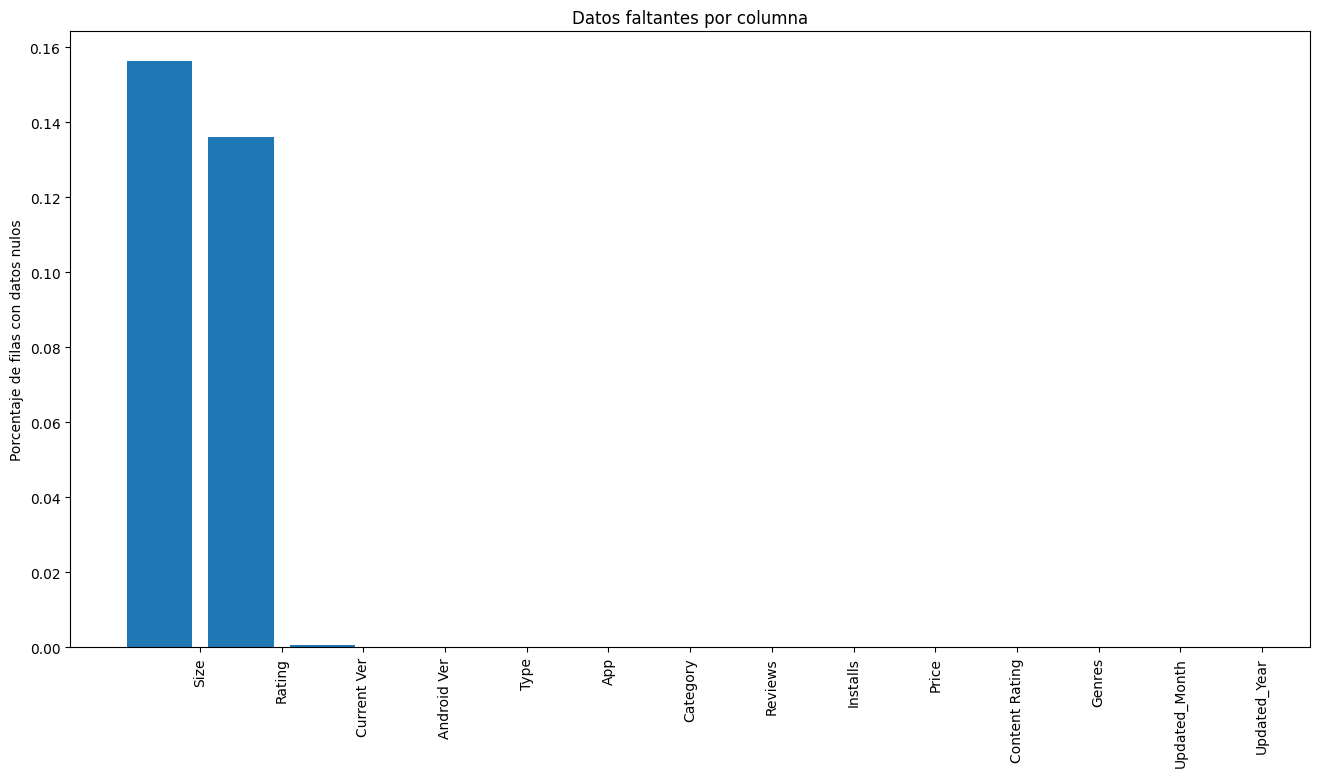

In [32]:
#Hacemos una grafica indicando los valores nulos
null_counts = df.isna().sum().sort_values(ascending=False) / len(df)

plt.figure(figsize=(16, 8))
plt.xticks(np.arange(len(null_counts)) + 0.5, null_counts.index, rotation='vertical')
plt.ylabel('Porcentaje de filas con datos nulos')
plt.bar(np.arange(len(null_counts)), null_counts)
plt.title('Datos faltantes por columna')
plt.show()

Es claro que hace faltan valores en las columnas "Size", "Rating", "Current Ver", "Android Ver" y "Type"


3.1. Manejo de los valores faltantes

En este caso haremos una imputación de los valores para las columnas "Size" y "Rating" usando la media, de esta manera se mantendrá una mejor distribución de los valores en la columna.

De igual manera para la columna "Type" haremos la imputación bajo la moda.

Los valores de las versiones no se harán ninguna imputación por ahora, dado que más adelante se hará un estudio más profundo para determinar la relevancia de estas columnas en el estudio.


In [33]:
def impute_median(series):
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(impute_median)

df['Size'] = df['Size'].transform(impute_median)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int64  
 13  Updated_Year    10840 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 1.5+ MB


Una vez hecha esta actualización vemos que ya no hay datos faltantes para las columnas "Rating" y "Size"

In [35]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

Procedemos con la columna "type":

In [36]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [37]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

3.2. Verificamos los datos duplicados

In [38]:
duplicados = df.duplicated()
print(duplicados.sum())


484


Como se observa existen 484 filas con datos que tienen exactamente la misma combinación de valores en todas sus columnas que una fila anterior, por lo tanto procederemos a eliminar estos valores

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
duplicados = df.duplicated()
print(duplicados.sum())

0


Al hacer esto ya no presentamos duplicidad en ningún dato y de esa manera ser más transparente al momento de hacer los modelos y generar resultados más precisos.

3.3. Verificamos las columnas con datos numéricos y categóricos



In [41]:
#Variables o columnas del tipo numérico
variables_numericas = [col for col in df.columns if df[col].dtype!='O']
variables_numericas

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [42]:
#Variables categóricas
variables_categoricas = [col for col in df.columns if df[col].dtype=='O']
variables_categoricas

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

3.4. Verificamos Valores Atípicos

Generamos una nueva función para determinar los datos atípicos en columnas con variables numericas.

In [43]:
def graficar_outliers(df):

  numericas = df.select_dtypes(include=['int64', 'float64'])

   #Box plot para observar valores atipicos
  num_cols_count = len(numericas.columns)
  num_rows = (num_cols_count + 2) // 3

  # Crear subplots
  fig, axs = plt.subplots(num_rows, 3, figsize=(20, 15))
  axs = axs.ravel()


  # Cambiar la paleta de colores
  sns.set_palette("Set2")


  # Iterar a través de las columnas y crear gráficos de caja en subplots
  for idx, columna in enumerate(numericas.columns):
      sns.boxplot(data=df[columna], ax=axs[idx], orient='h')
      axs[idx].set_title(f'Boxplot de {columna}')

  # Ocultar subplots vacíos si es necesario
  for i in range(num_cols_count, num_rows * 3):
      fig.delaxes(axs[i])

  plt.tight_layout()
  plt.show()

Verificamos:

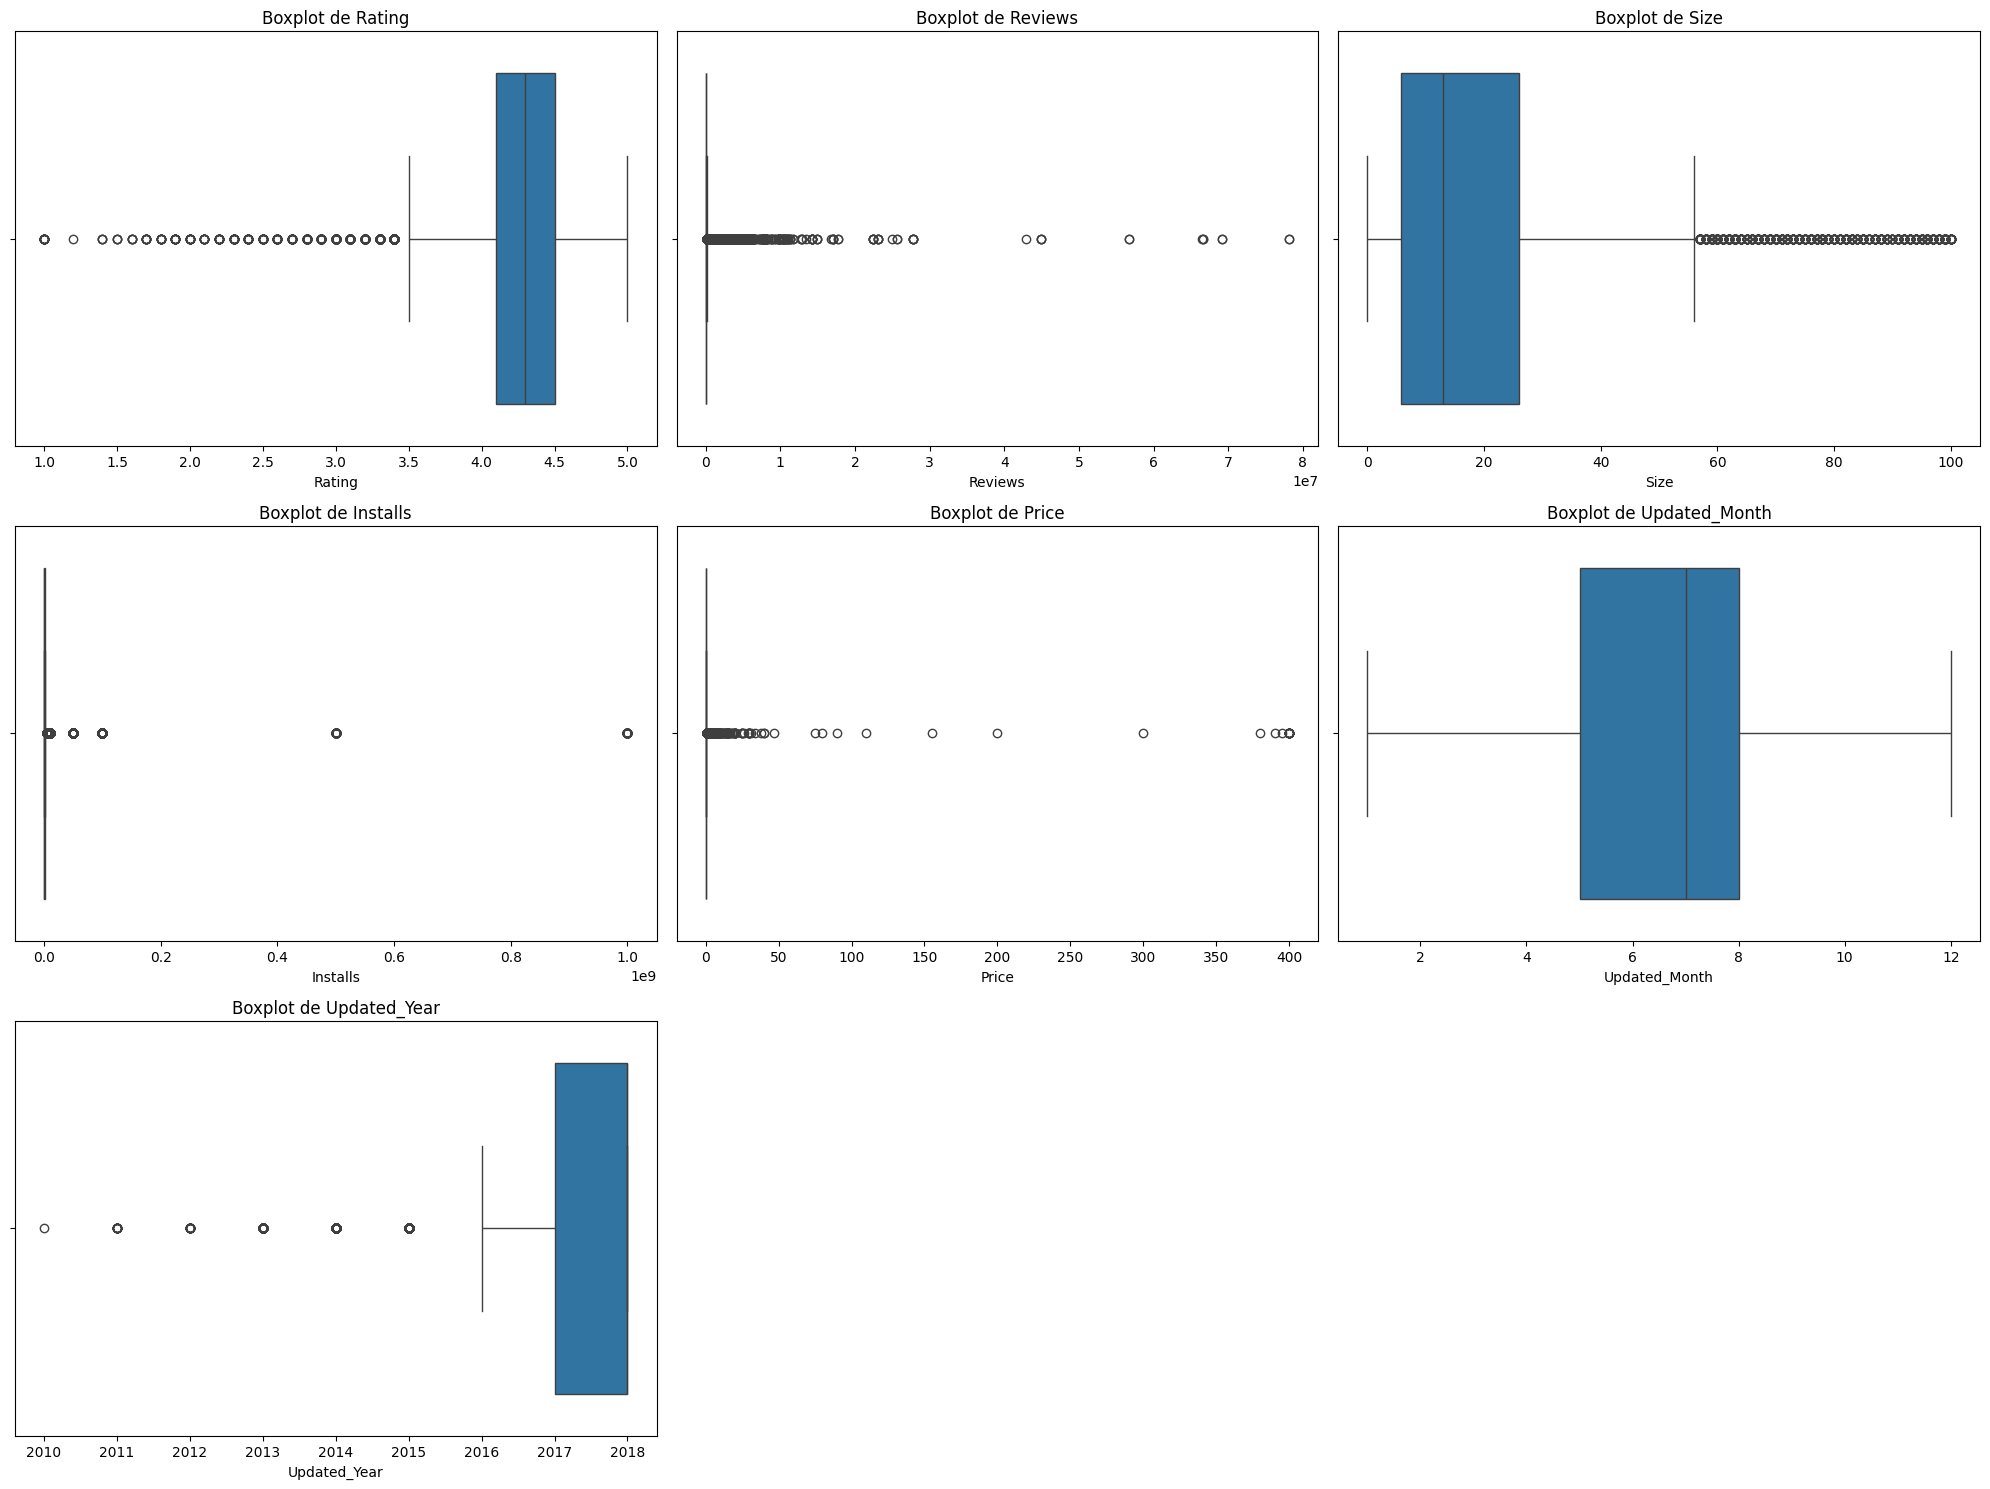

In [44]:
graficar_outliers(df)

Dado que los datos atípicos son representativos de una parte legítima del conjunto de datos y no son el resultado de errores de medición o captura, eliminarlos puede afectar la representatividad de la muestra y sesgar los resultados del análisis, por lo tanto no se procederá con la eliminación.

# 4. Análisis Exploratorio de Datos (EDA)

4.1. Para la columna "Category"

In [45]:
#Verificamos la cantidad de variables en la columna "Category"
df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

Procedemos a hacer una gráfica representativa de la cantidad de apps en relación con la categoría que la representa.

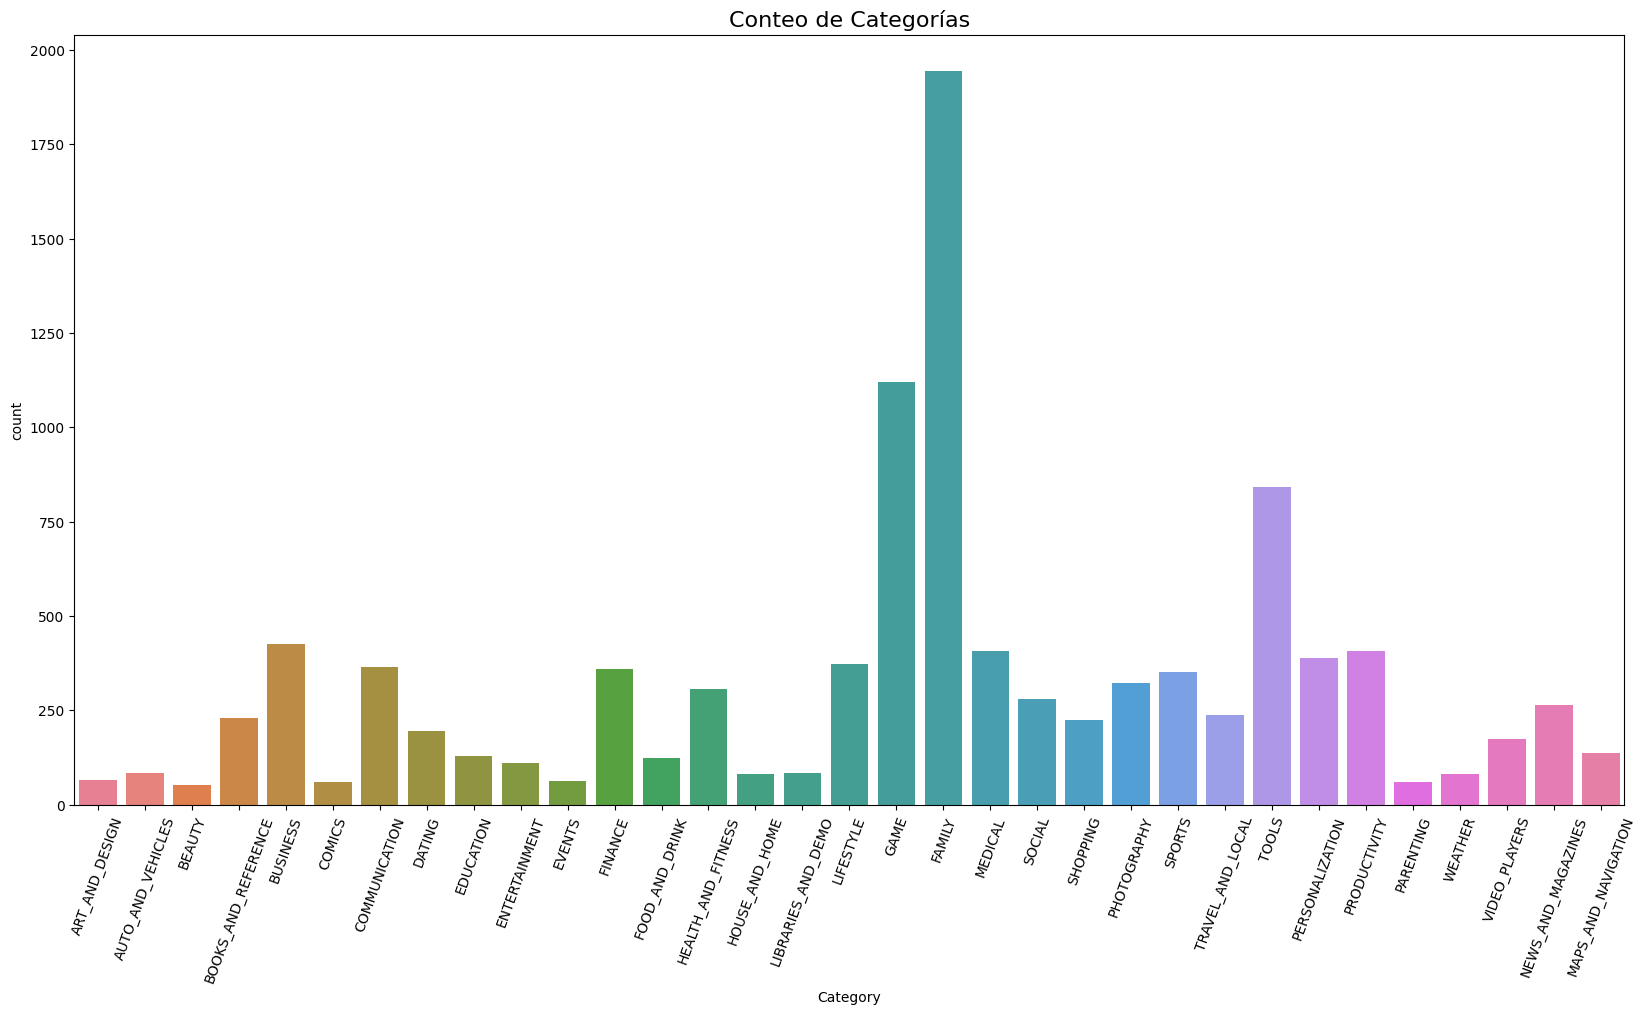

In [46]:
# Configuramos el tamaño de la figura
plt.rcParams['figure.figsize'] = (20, 10)

# Seleccionamos una paleta de colores
custom_palette = sns.color_palette("husl", n_colors=len(df['Category'].unique()))

# Creamos el conteo de barras con la paleta de colores y rotación de etiquetas
sns.countplot(x='Category', data=df, palette=custom_palette)
plt.xticks(rotation=70)

# Agregamos un título
plt.title('Conteo de Categorías', fontsize=16)

# Mostrar la gráfica
plt.show()

Podemos ver que las categorías más comunes en este data set son "Family", "Game" y "Tools"

Para hacer una representación alterna de las categorías más comunes procedemos con una nube de palabras:

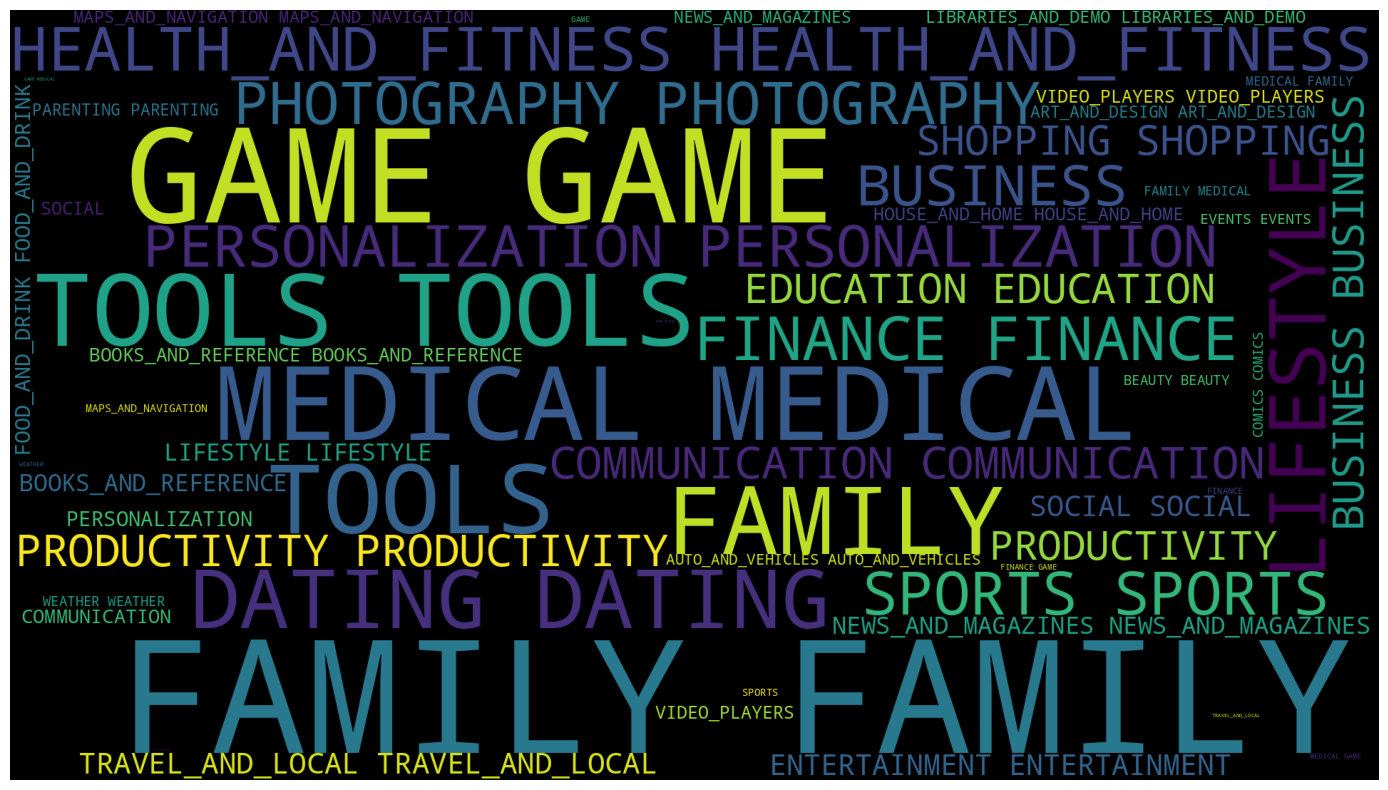

In [47]:
#Hacemos una nube de palabras con las categorías
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

4.2. Relación entre "Category" y "Rating"

Graficamos la relación como sigue:

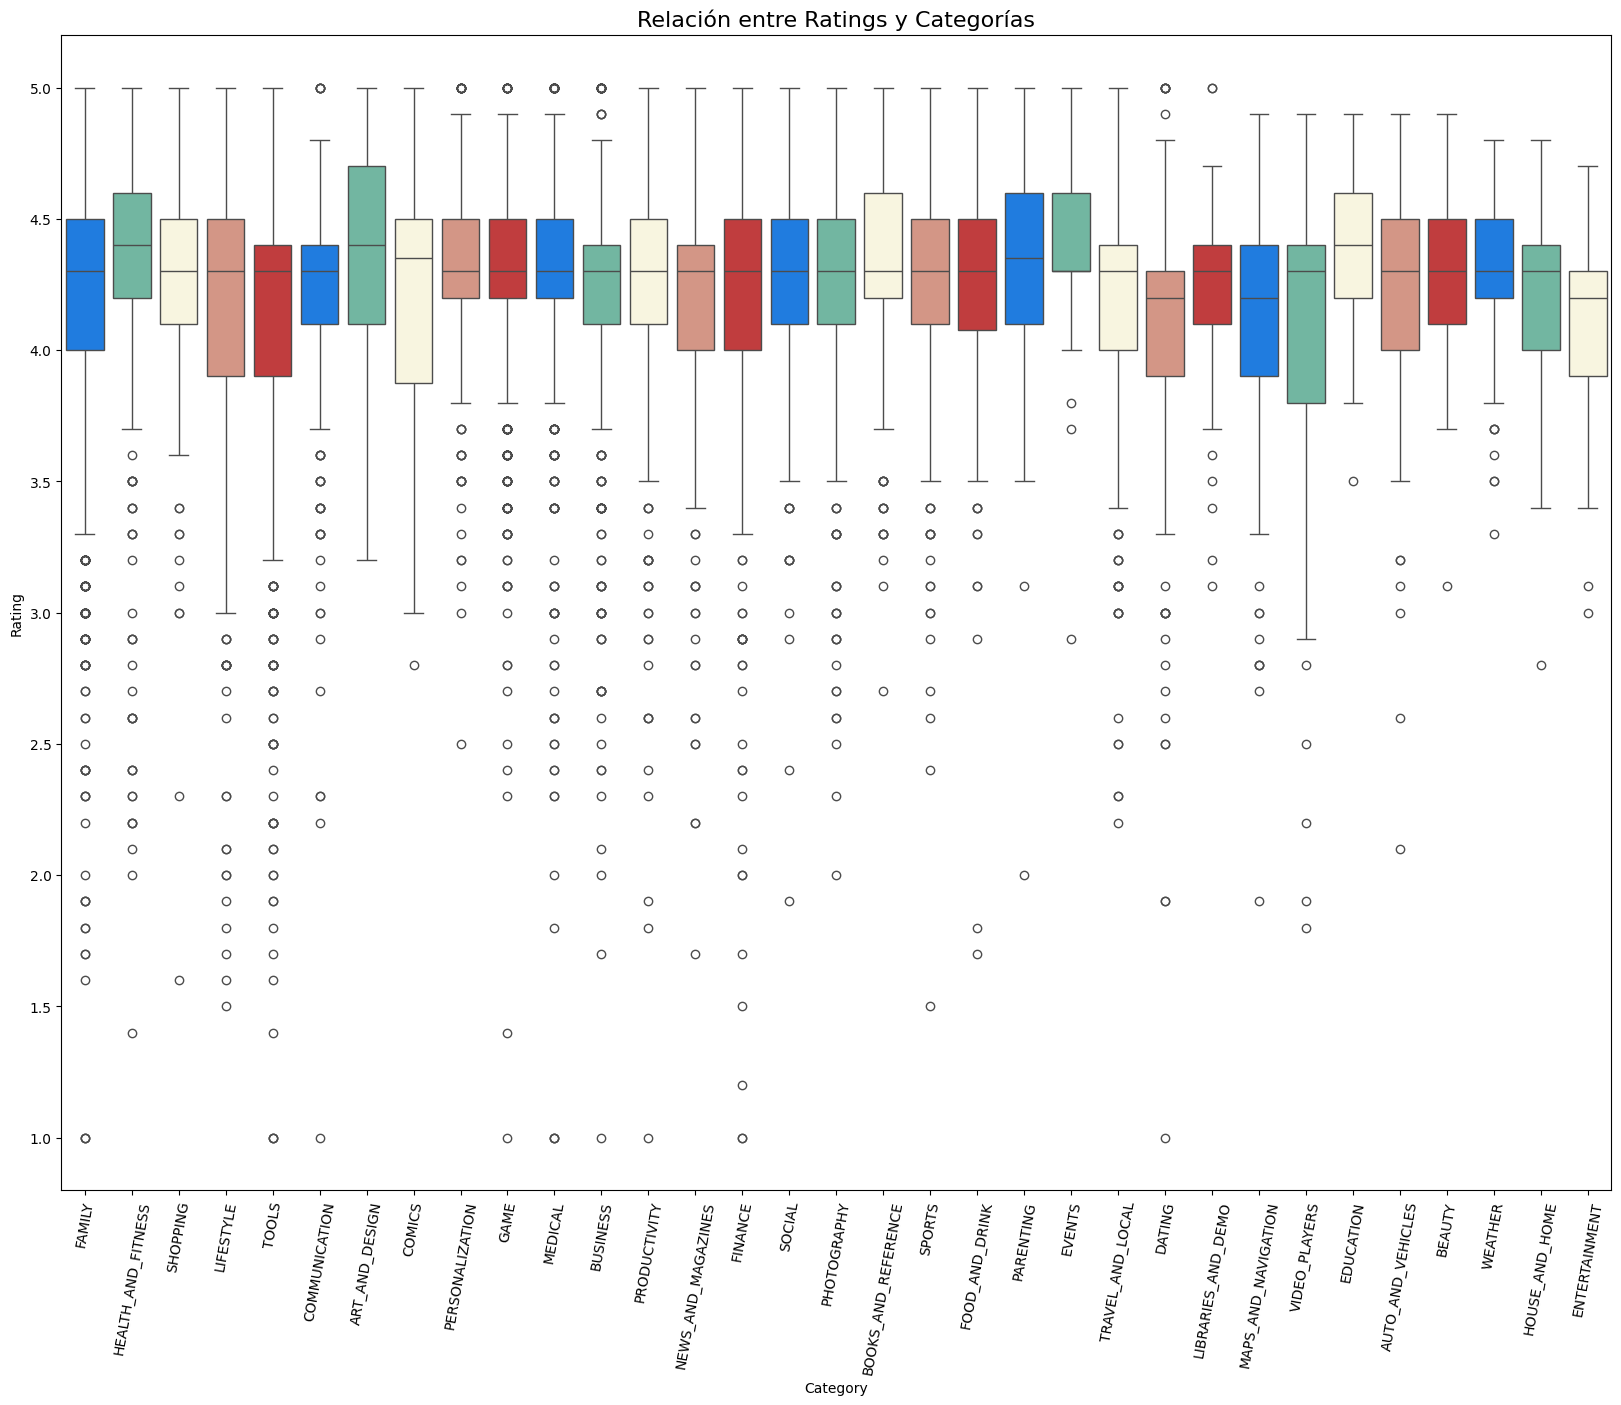

In [48]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(20, 15))

# Seleccionamos una paleta de colores
custom_palette2 = ["#007bff", "#66c2a5", "#fcf8dc", "#e08e79", "#d62728"]

# Creamos el boxplot con la paleta de colores y rotación de etiquetas
sns.boxplot(y='Rating', x='Category', data=df.sort_values('Rating', ascending=False), palette=custom_palette2)
plt.xticks(rotation=80)

# Agregamos el título
plt.title('Relación entre Ratings y Categorías', fontsize=16)

# Mostramos la gráfica
plt.show()

Como podemos observar la mayoría de las categorias tienen un promedio de "Ratings" entre 4.0 a 4.5

4.3. Columna "Type"

In [49]:
df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64

Hacemos la representación gráfica como sigue:

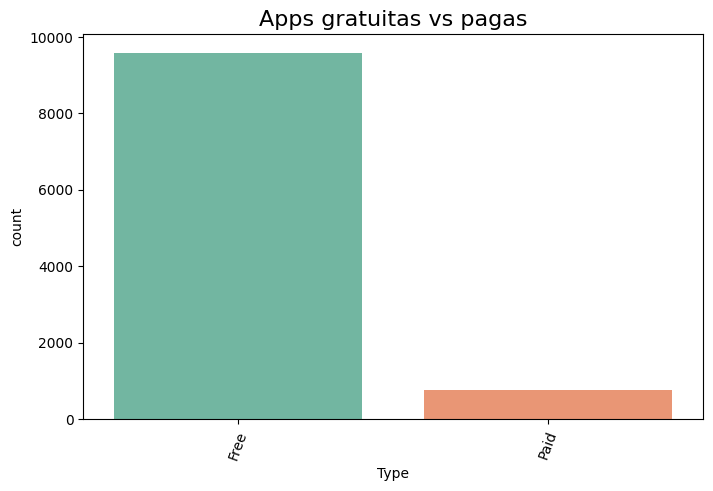

In [50]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(8, 5))

# Seleccionamos una paleta de colores (puedes elegir la que más te guste)
custom_palette = sns.color_palette("Set2")

# Creamos el countplot con la paleta de colores y rotación de etiquetas
sns.countplot(x='Type', data=df, palette=custom_palette)
plt.xticks(rotation=70)

# Agregamos un título
plt.title('Apps gratuitas vs pagas', fontsize=16)

# Mostrar la gráfica
plt.show()

vemos que la mayoria de las apss son gratuitas, de igual manera procedemos a hacer una representación gráfica para determinar de manera porcentual cuantas son gratuitas y cuantas son pagas:

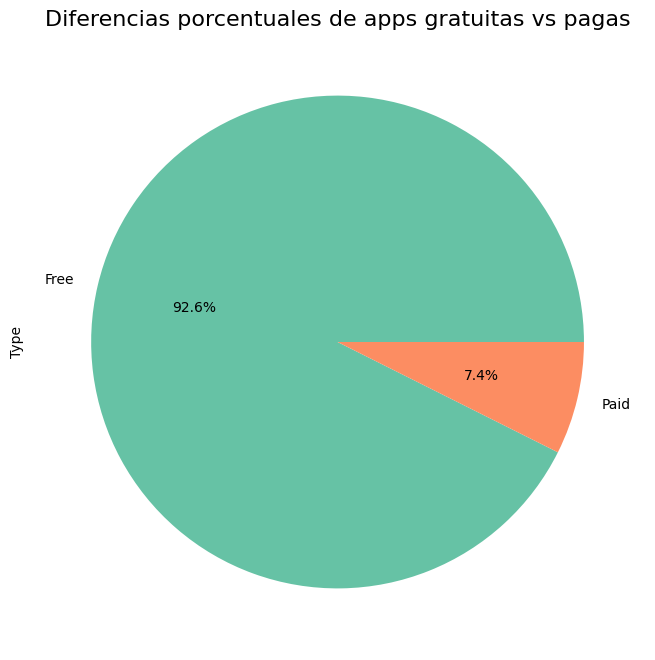

In [51]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(8, 8))

# Creamos la gráfica de pastel con porcentajes
df["Type"].value_counts().plot.pie(autopct="%1.1f%%")

# Agregamos un título
plt.title("Diferencias porcentuales de apps gratuitas vs pagas", fontsize=16)

# Mostramos la gráfica
plt.show()

Más del 90% de las apps son gratuitas, lo que puede sesgar un poco el estudio para las apps que sean pagas.

4.4. Relación entre la columna "Type" y "Rating"

Hacemos una representación gráfica donde se denote la relación entre ambas variables:

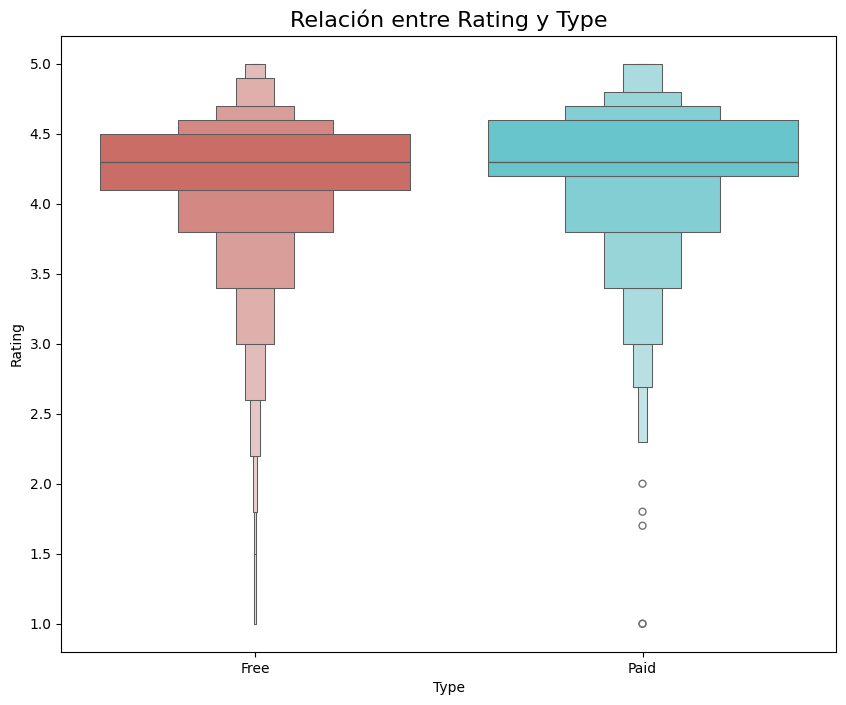

In [52]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Creamos la gráfica de relación entre Rating y Type
sns.boxenplot(y='Rating', x='Type', data=df.sort_values('Rating', ascending=False), palette='hls')

# Agregamos un título
plt.title("Relación entre Rating y Type", fontsize=16)

# Mostramos la gráfica
plt.show()

Al igual que en la comuna "Category" vemos que el promedio del "Rating" para las apps tanto gratuitas como pagas está entre 4.0 a 4.5

4.5. Columna "Content Rating"

Como sabemos esta columna representa el público objetivo apropiado de la aplicación

In [53]:
df['Content Rating'].value_counts()

Everyone           8381
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

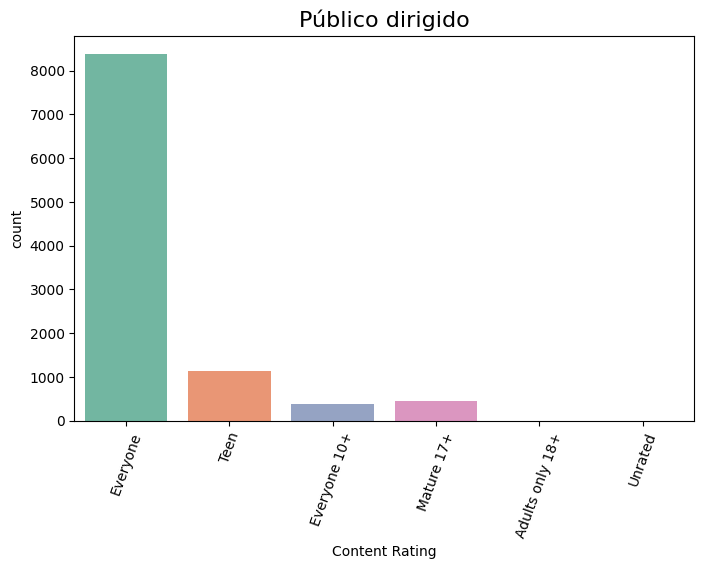

In [54]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(8, 5))

# Seleccionamos una paleta de colores (puedes elegir la que más te guste)
custom_palette = sns.color_palette("Set2")

# Creamos el countplot con la paleta de colores y rotación de etiquetas
sns.countplot(x='Content Rating', data=df, palette=custom_palette)
plt.xticks(rotation=70)

# Agregamos un título
plt.title('Público dirigido', fontsize=16)

# Mostrar la gráfica
plt.show()

Siendo la mayoría de las aplicaciones desarrolladas para un público general y adolescentes

4.6. Relación entre la columna "Content Rating" y "Rating"

Graficamos esta representación como sigue:

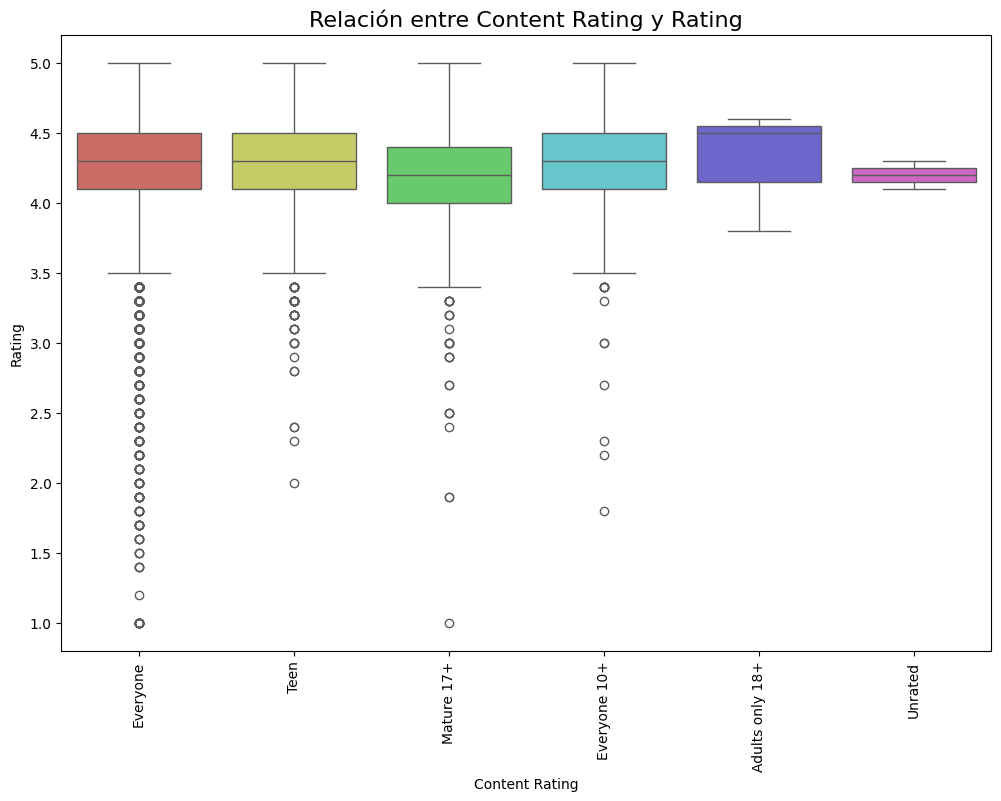

In [55]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos la gráfica de relación entre Content Rating y Rating
sns.boxplot(y='Rating', x='Content Rating', data=df.sort_values('Rating', ascending=False), palette='hls')

# Agregamos un título
plt.title("Relación entre Content Rating y Rating", fontsize=16)

# Rotsamos las etiquetas del eje x para mayor claridad
plt.xticks(rotation=90)

# Mostramos la gráfica
plt.show()

Como hemos visto con anterioridad, el promedio de calificaciones según el público al cual va dirigido está entre 4.0 a 4.5

Establecemos una correlación entre el público objetivo y las intalaciones mediante el siguiente gráfico:

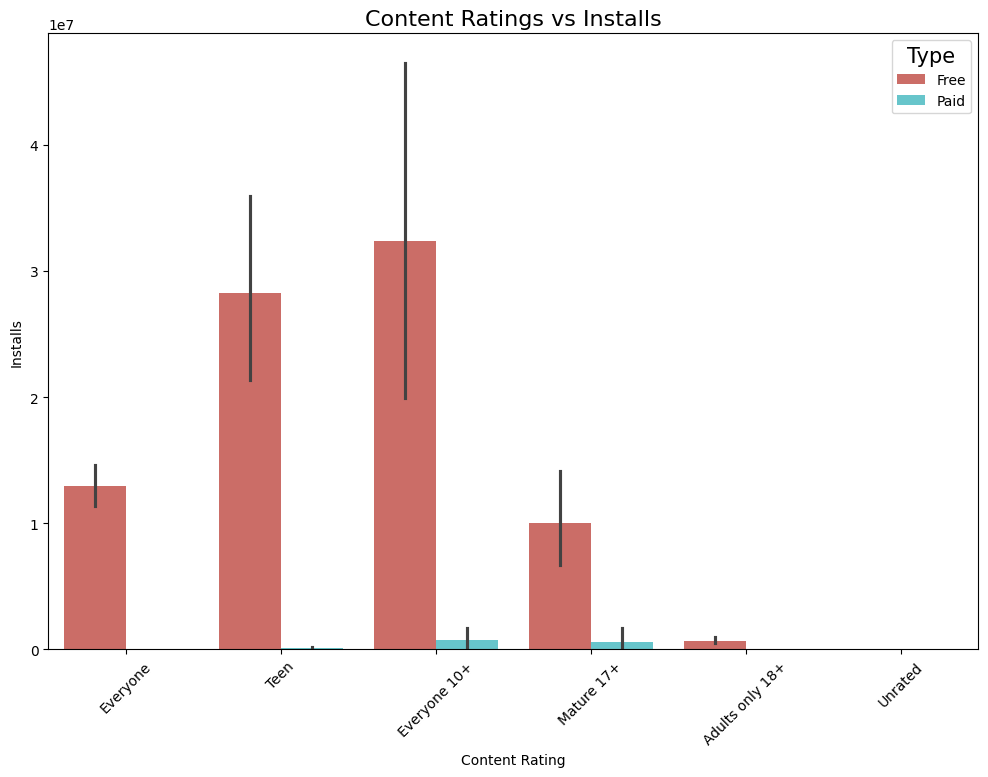

In [56]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(12, 8))

# Creamos la gráfica de barras para Content Ratings vs Installs
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df, palette='hls')

# Agregamos un título
plt.title("Content Ratings vs Installs", fontsize=16)

# Rotamos las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostramos la leyenda
plt.legend(title="Type", title_fontsize='15')

# Mostramos la gráfica
plt.show()

Como vemos las apps que más se descargan son pertenecientes a un público general mayor a 10 años.

De igual manera se puede deducir que este público puede pertenecer a adolescentes, sin embargo, para eso deberiamos saber la edad de los usuarios que descargan este tipo de app el cual no tenemos presente como variable del data set.

4.7. Columna "Genres"

Recordemos que esta columna representa el género de la aplicación es decir si es por motivos de entretenimiento, educación, finanazas o como herramienta

In [57]:
df['Genres'].value_counts().head(30)

Tools                      841
Entertainment              588
Education                  527
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  372
Communication              366
Sports                     364
Finance                    360
Action                     356
Photography                322
Health & Fitness           306
Social                     280
News & Magazines           264
Travel & Local             236
Books & Reference          230
Shopping                   224
Arcade                     218
Simulation                 199
Dating                     196
Casual                     191
Video Players & Editors    173
Maps & Navigation          137
Puzzle                     136
Food & Drink               124
Role Playing               109
Strategy                   105
Racing                      98
Name: Genres, dtype: int64

Vemos que la gran mayoría de las apps está en un grupo selecto de género tipo: "Herramienta", "Entretenimiento", "Educación". "Negocios" y "Medica"

Ahora veremos alguna informacion adicional sobre las versiones de las apps

4.8. Columna "Current ver"

In [58]:
df['Current Ver'].value_counts()

Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Podemos observar que la mayoría de las versiones actuales de las app varia según el dispositivo, lo que no nos da información de relevancia.

4.9. Columna "Android ver"

In [59]:
df['Android Ver'].value_counts()

4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

En esta sección vemos que para la mayoría de las apps la versión de Android tiene que estar entre las últimas para su buen desempeño

Procedemos a hacer un estudio más detallado usando gráficas de densidad según el tipo de las apps.

Recordemos que las gráficas de densidad permiten identificar la forma y la dispersión de los datos, así como la presencia de cualquier sesgo o agrupamiento. Esto ayuda a comprender mejor la naturaleza de los datos y a tomar decisiones informadas sobre el análisis estadístico y los modelos predictivos.


Analizamos a travez de gráficas de densidad las columnas con variables cuantitativas con respecto al ratings

In [60]:
def kde_plot(column_name):
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[df['Type'] == 'Free'][column_name], shade=True, label='Free')
    sns.kdeplot(data=df[df['Type'] == 'Paid'][column_name], shade=True, label='Paid')
    plt.title(f"Grafica de densidad de la variable '{column_name}'", fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Densidad", fontsize=12)
    plt.legend()
    plt.show()

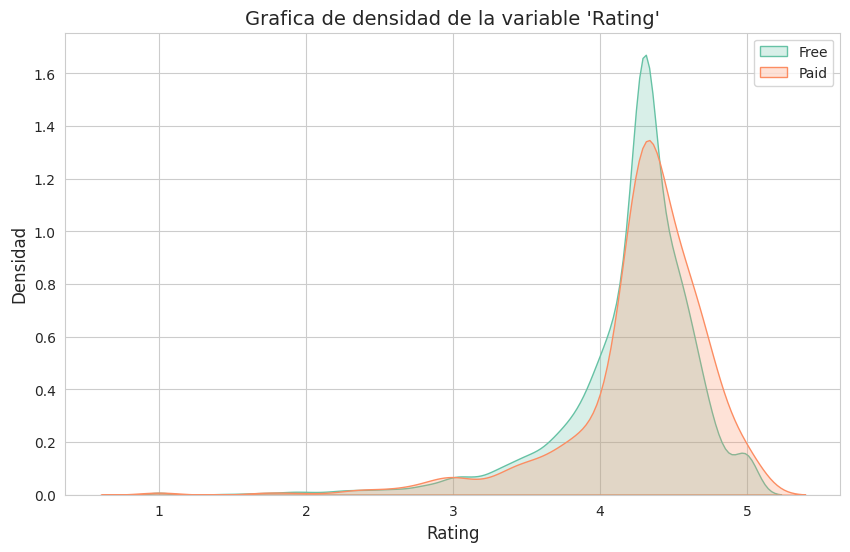

In [61]:
kde_plot('Rating')

Ya habiamos visto que la mayoría de las apps presentan un "rating" entre 4.0 a 4.5. Esto puede ser una desventaja al análizar los modelos dado que puede sesgar dicho modelo por que no hay una distribución equitativa.

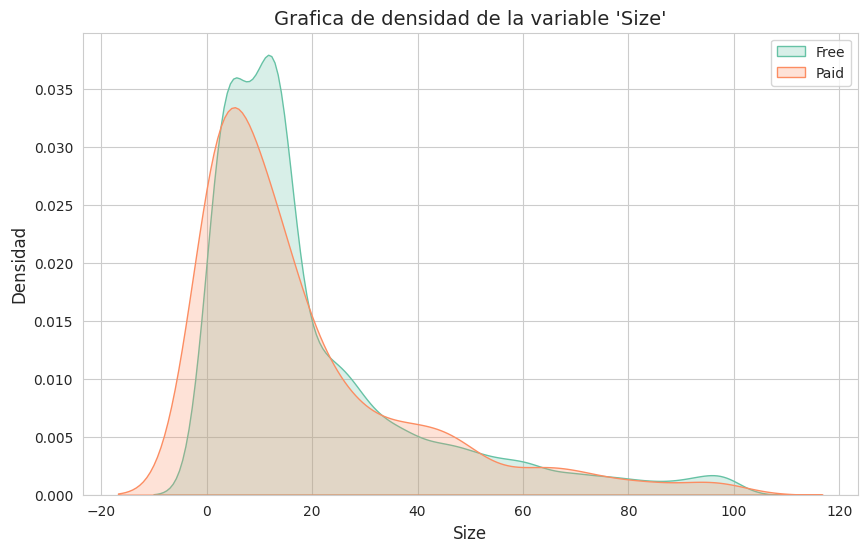

In [62]:
kde_plot('Size')

La mayoría de las apps tienen un peso entre 0 y 20 megas

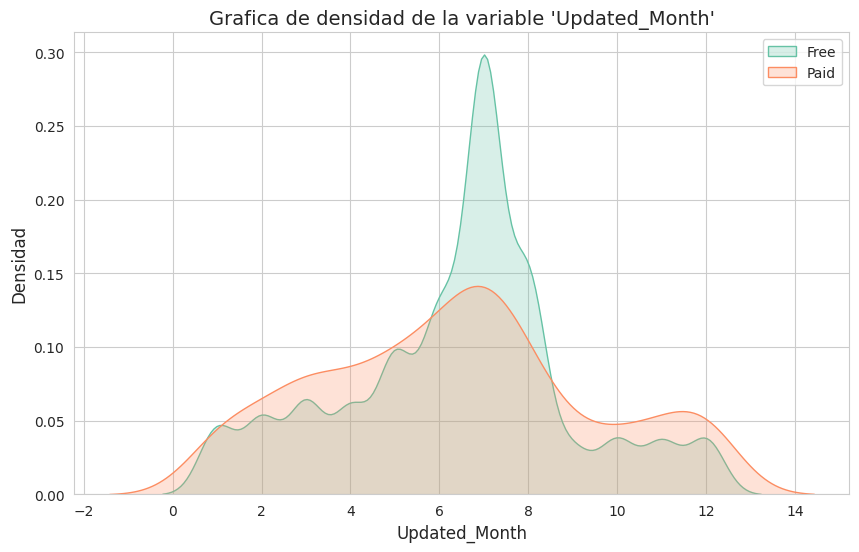

In [63]:
kde_plot('Updated_Month')

Como podemos ver, los meses más comunes para hacer las actualizaciones de las apps varían entre Mayo a Septiembre, sin embargo vemos que para las apps con costo pueden ser mas constantes a lo largo del año.

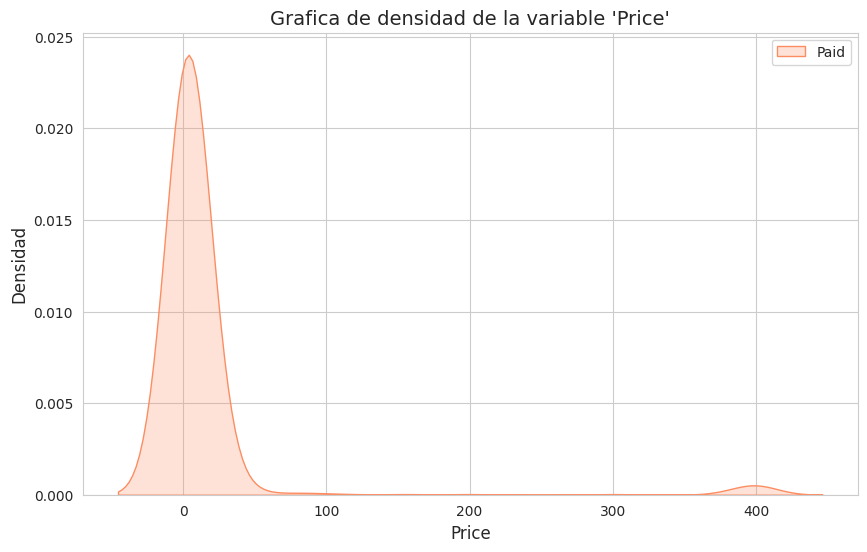

In [64]:
kde_plot('Price')

Para la mayoría de apps pagas, los precios no sobrepasan los 100 dolares.

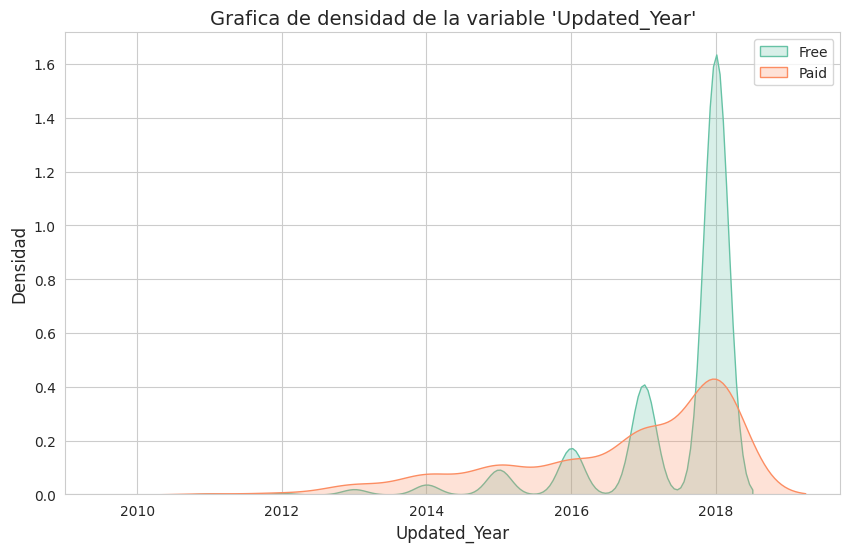

In [65]:
kde_plot('Updated_Year')

Como sabemos las aplicaciones están en constante actualización y dado que este data set es del 2018, la mayoria de las actualizaciones se dieron en este último año.  

Veremos a continuación analisis con gráficas de tipo scatter plot, entre diferentes variables. Esto con el objetivo de tener una mejor visual de la relacion entre diferentes variables en estudio.

In [66]:
#Hacemos una función como sigue
def scatters(col1, col2):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Gráfico de dispersión de {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)

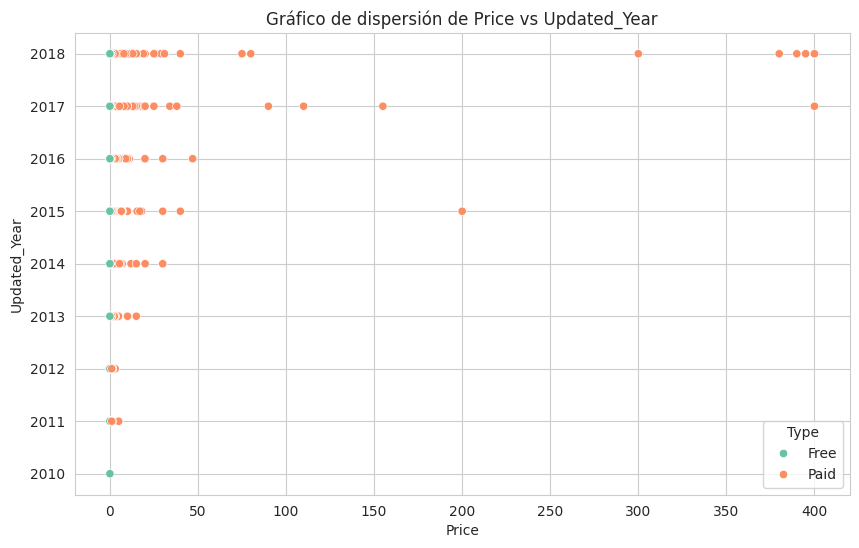

In [67]:
scatters('Price', 'Updated_Year')

Como observamos anteriormente, la mayoría de apps no superan los 50 dolares, sin embargo, vemos que a medida que la actualización es más reciente el precio tiende a subir.

Esto se puede dar por un tema de la economía en general.

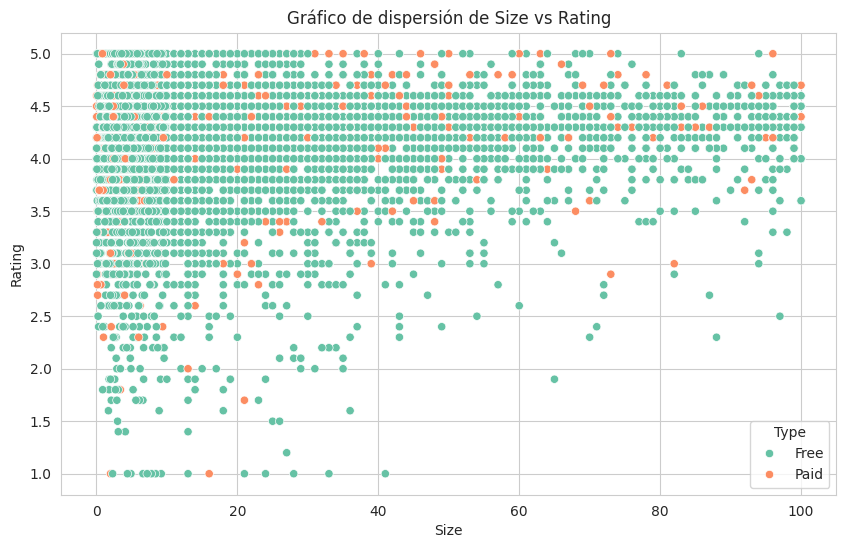

In [68]:
scatters('Size', 'Rating')

Dado que el promedio de calificacón de app esta entre los 3.5 a 4.5 podríamos concuncluir que es indiferente el peso de la app en relación a la calificación por parte de los usuarios.

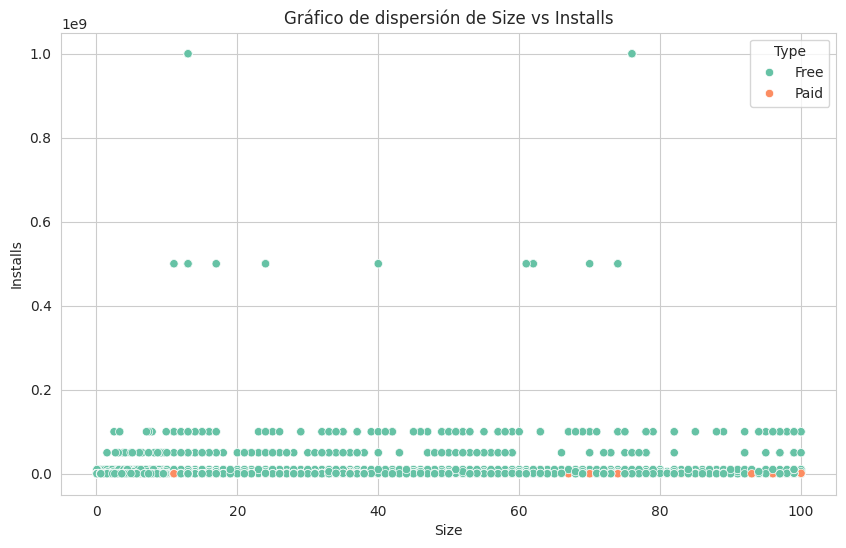

In [69]:
scatters('Size', 'Installs')

De igual manera el número de intalaciones no varía segun su peso

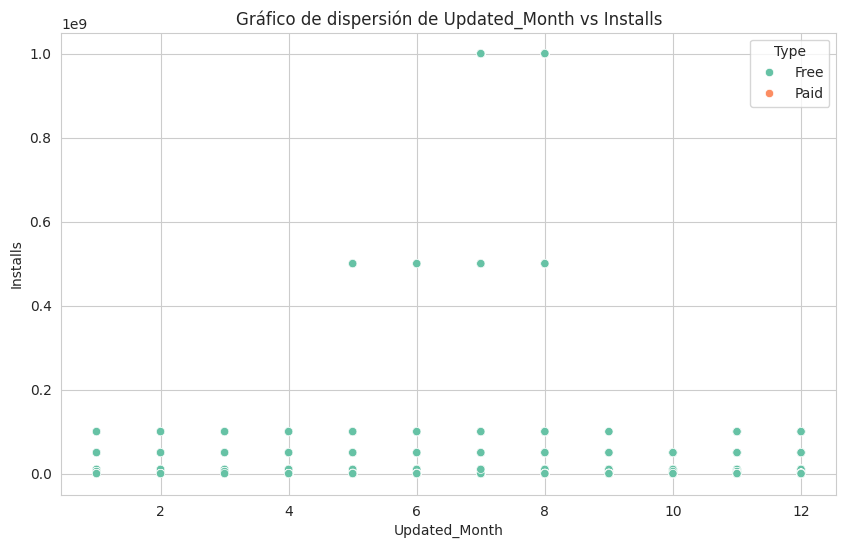

In [70]:
scatters('Updated_Month', 'Installs')

Lo mismo ocurre con la relación entre el mes en que la app fué actualizada con el número de instalaciones.

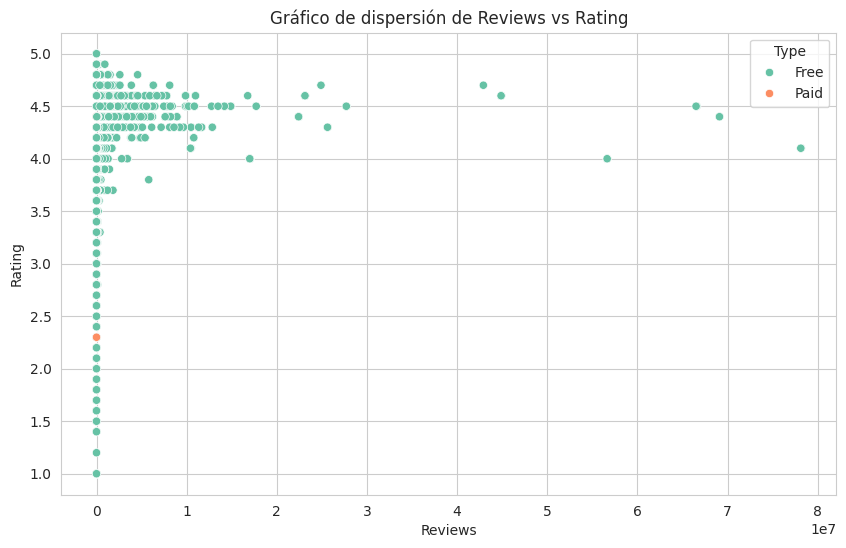

In [71]:
scatters('Reviews', 'Rating')

Aca observamos que los usuarios tienden a dejar mayor número de reseñas cuando hay una calificación promedio entre 4.0 a 4.5. Sin embargo hay que tomar en cuenta que la mayoría de datos tiene una calificación alta lo que podría sesgar esta conclusión.

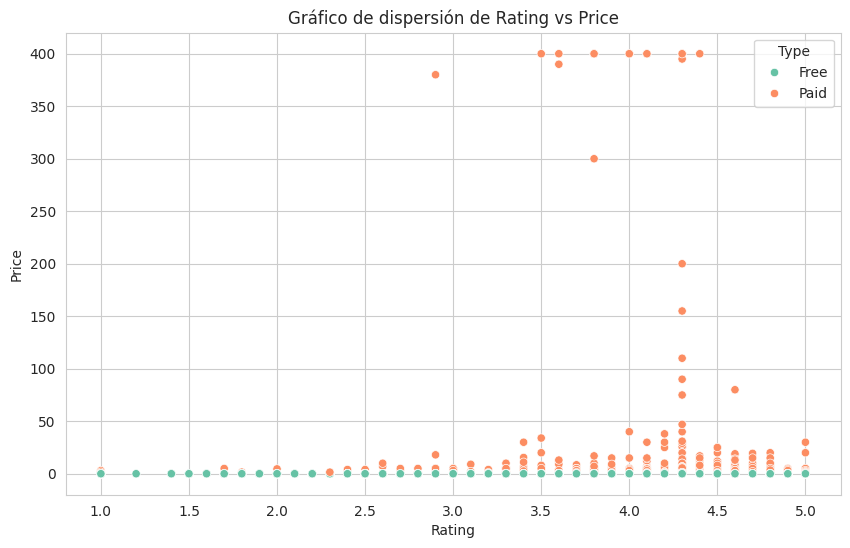

In [72]:
scatters('Rating', 'Price')

Al igual de lo que hemos comentado, las calificaciones de las apps pagas tienen están en un promedio entre 3.5 a 4.8.

Vemos también que ninguna app por encima de los 100 dolare tiene una calificación perfecta, lo que deduce que el usuario al pagar tiende a ser mucho más estricto con el funcionamiento de la app.



4.10. Análisis para apps con rating de 5

¿Cuantas aplicaciones tiene un 'Rating' de 5?

In [73]:
df_rating_5 = df[df.Rating == 5.]
print(f'Hay un total de {df_rating_5.shape[0]} apps con un rating de 5.0')

Hay un total de 271 apps con un rating de 5.0


Verificamos para estas aplicaciones la cantidad de instalaciones

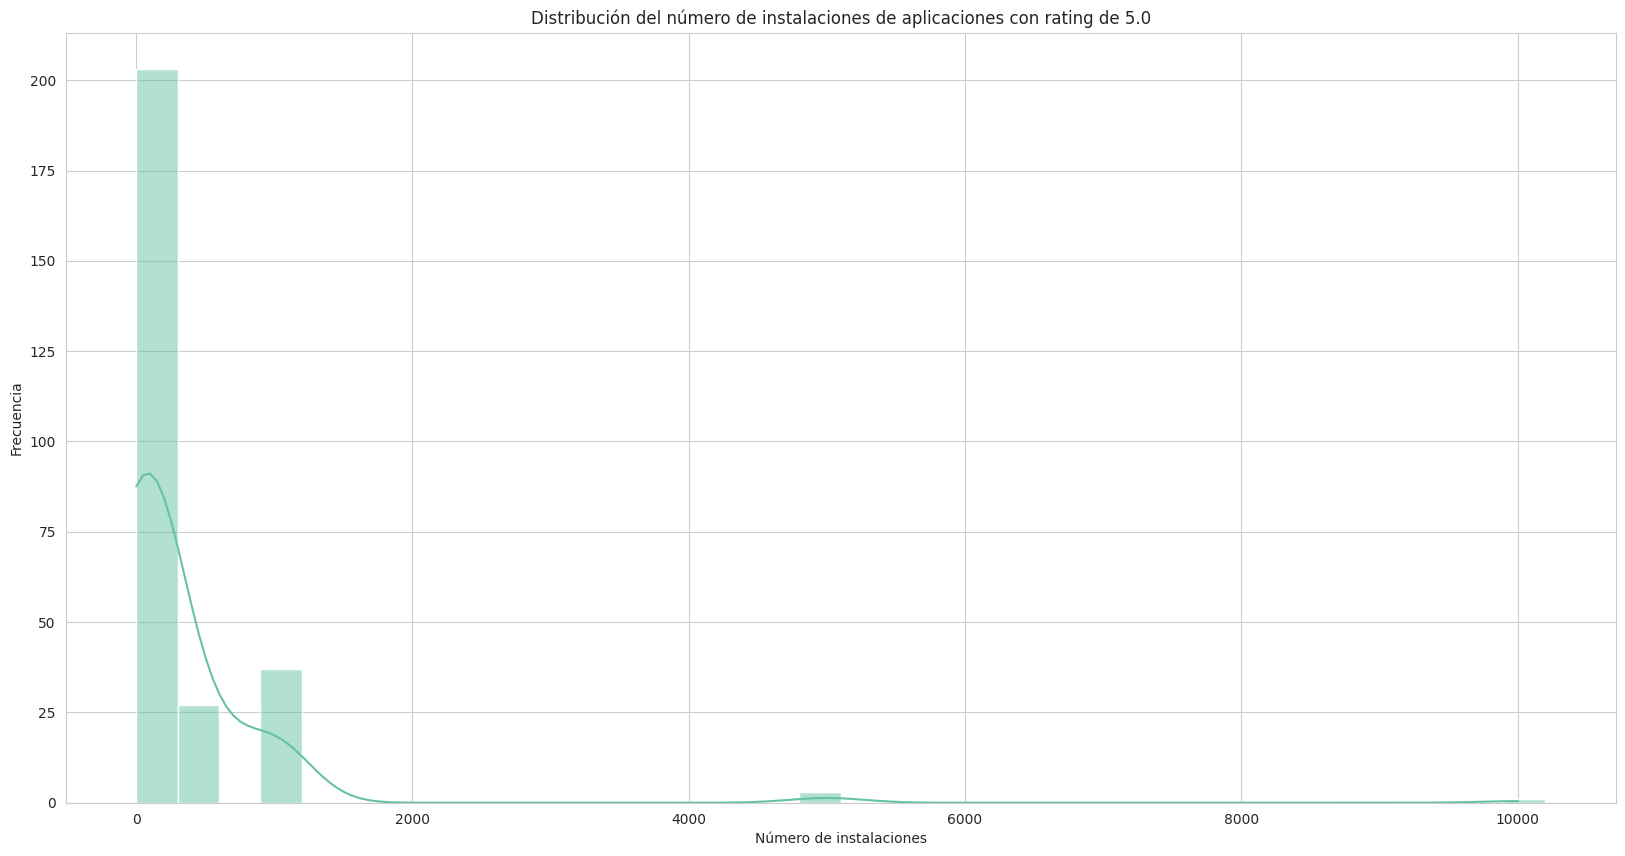

In [74]:
# Calcular el rango de los bins
bins_range = range(0, df_rating_5['Installs'].max() +   300, 300)

# Crear el histograma con los bins definidos
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=bins_range)

# Añadir título y etiquetas de los ejes
plt.title('Distribución del número de instalaciones de aplicaciones con rating de 5.0')
plt.xlabel('Número de instalaciones')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

Si bien las aplicaciones han recibido calificaciones completas, la mayoría de ellas tienen un número de instalaciones relativamente bajo. Esto sugiere que, a pesar de sus buenas valoraciones, estas aplicaciones pueden no ser ampliamente adoptadas o consideradas como los mejores productos

Reviews

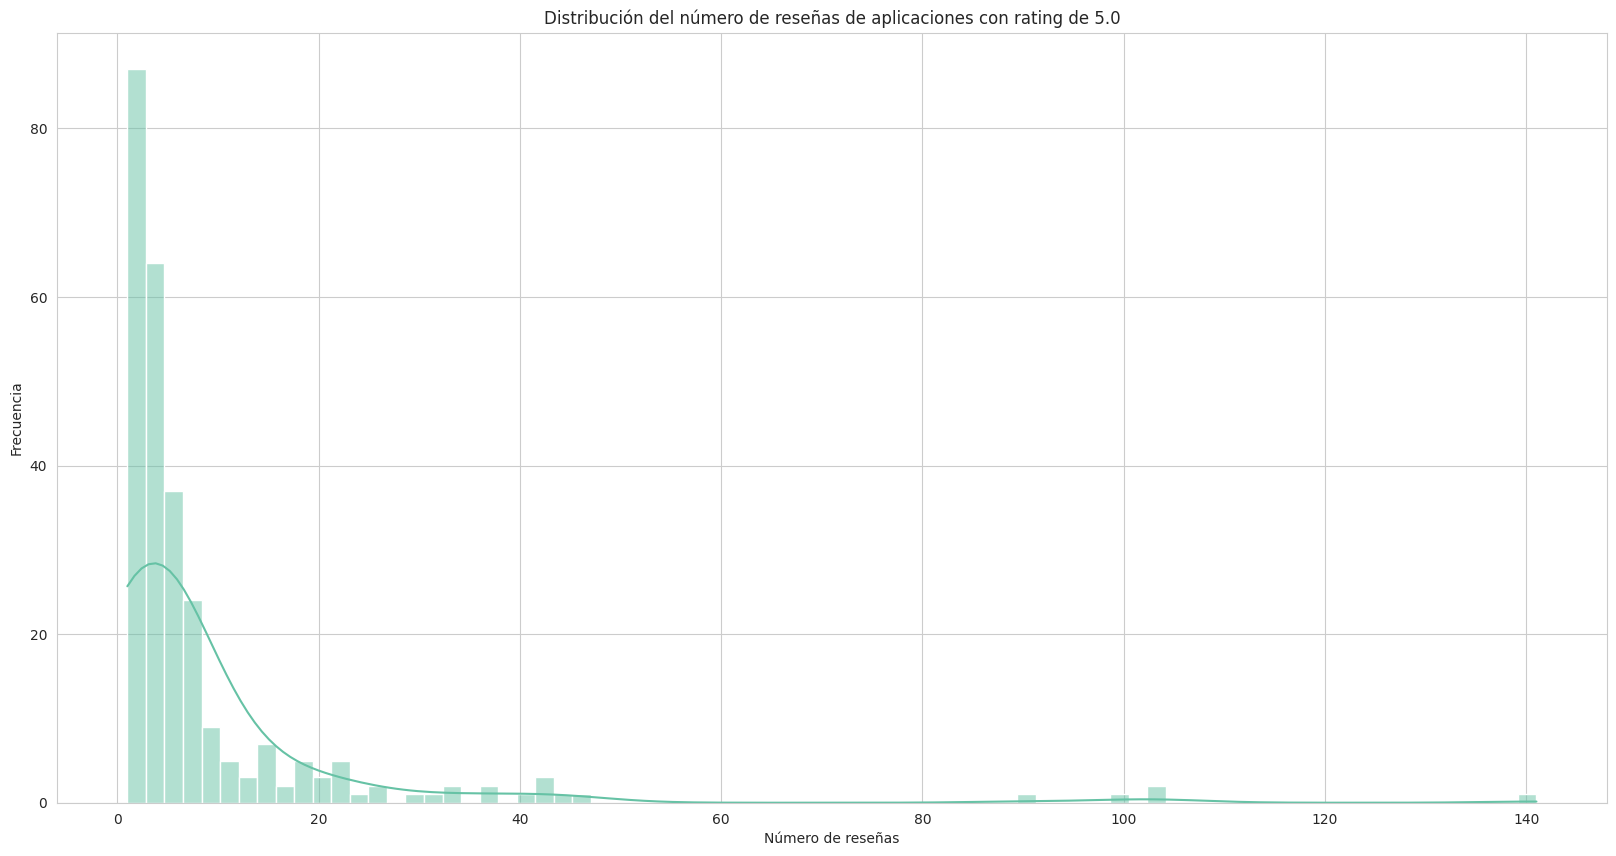

In [75]:
# # Calcular el rango de los bins
# bins_range2 = range(0, df_rating_5['Installs'].max() +   1, 1)

# Crear el histograma con los bins definidos
sns.histplot(data=df_rating_5, x='Reviews', kde=True)

# Añadir título y etiquetas de los ejes
plt.title('Distribución del número de reseñas de aplicaciones con rating de 5.0')
plt.xlabel('Número de reseñas')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

La distribución está sesgada hacia la derecha, lo que indica que hay muchas aplicaciones con pocas reseñas que han recibido calificaciones de 5.0, lo cual puede resultar engañoso.

Verificamos el porcentaje de categorias con mayor rating de 5.0

In [76]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

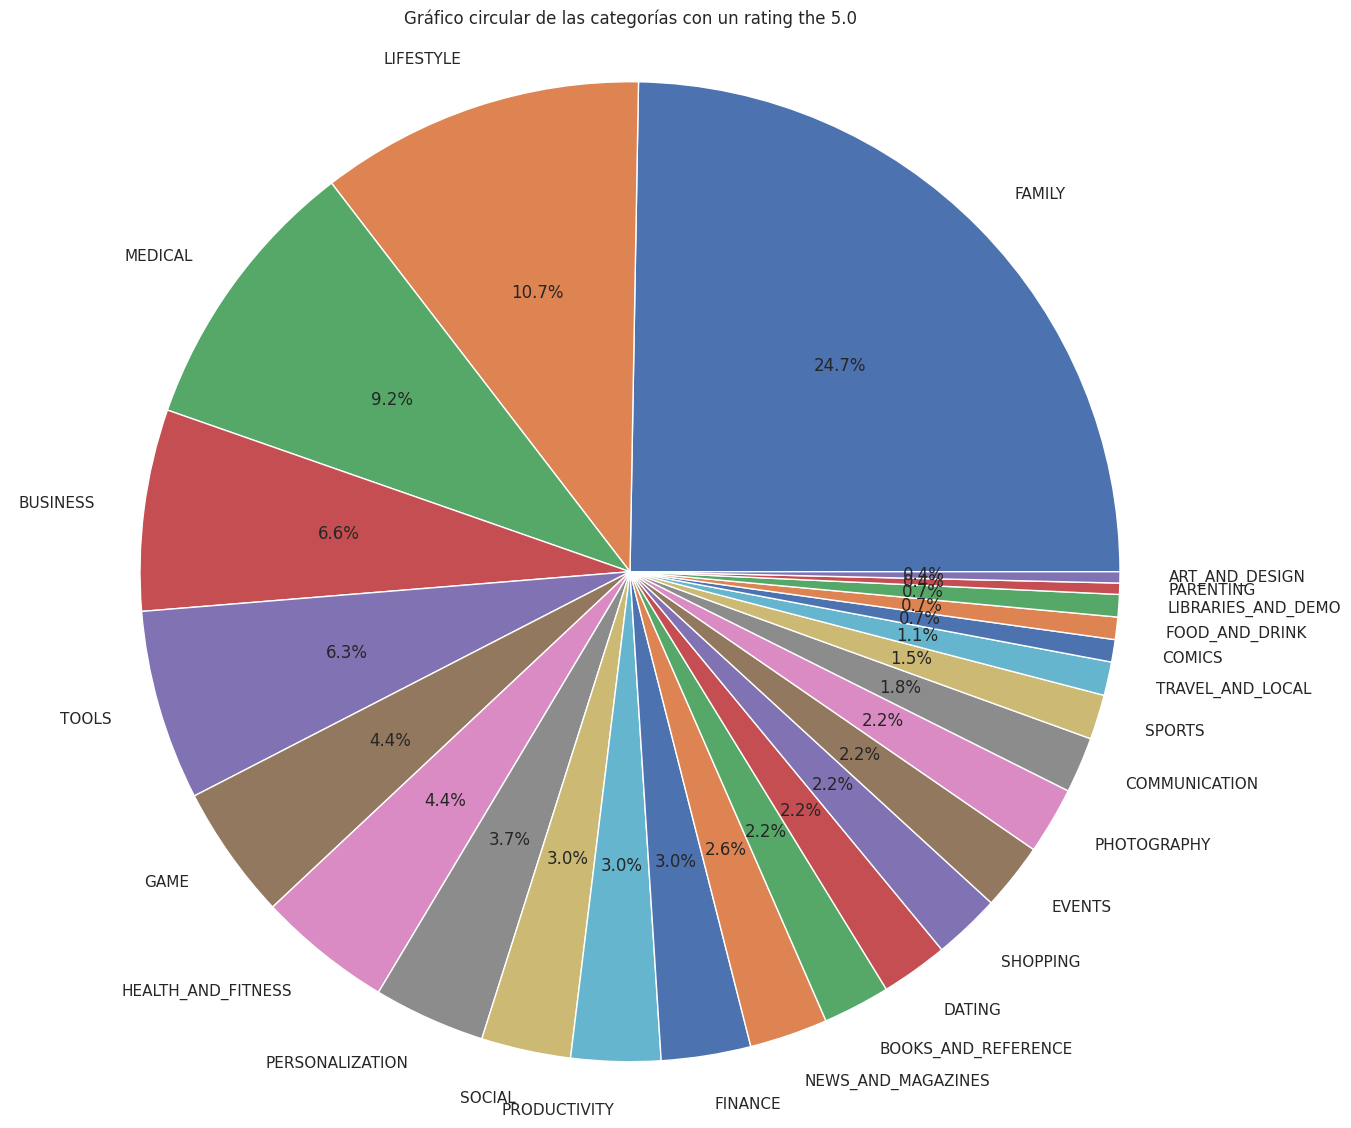

In [77]:
# Creamos un gráfico circular
plt.figure(figsize=(16, 14))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Gráfico circular de las categorías con un rating the 5.0')
plt.axis('equal')
plt.show()

Las aplicaciones en las categorías 'Family', 'Life Style' y 'Medical' son las que reciben la mayor calificación de 5 en la Google Play Store, siendo 'Family' la que representa aproximadamente una cuarta parte del total

Verificamos las aplicaciones con un rating de 5 según su tipo (Son gratuitas o pagas)

In [78]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

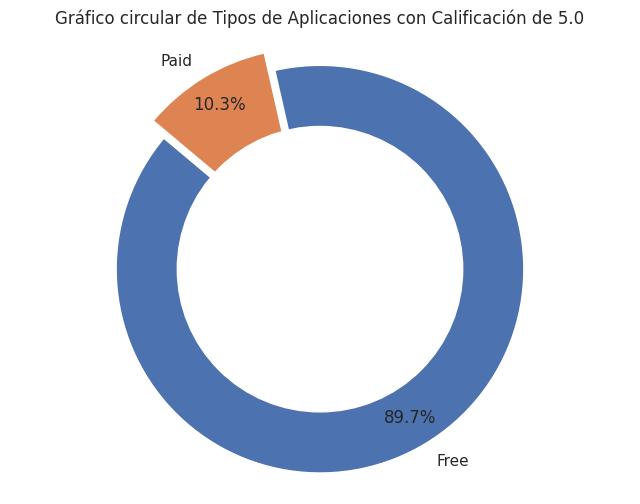

In [79]:
# Crear un gráfico circular
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Datos para el gráfico circular
tamaños = df_rating_5_type.iloc[:, 1]
etiquetas = df_rating_5_type.iloc[:, 0]

# Extraer una porción del gráfico circular para resaltarlo
explote = (0, 0.1)  # Ajusta el segundo valor para controlar la distancia de la porción extraída

# Crear el gráfico circular con colores predeterminados
plt.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explote)

# Dibujar un círculo en el centro para que parezca un gráfico de dona
circulo_central = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo_central)

# El ratio de aspecto igual garantiza que el gráfico circular sea dibujado como un círculo.
plt.axis('equal')

# Título
plt.title('Gráfico circular de Tipos de Aplicaciones con Calificación de 5.0')

# Mostrar el gráfico circular
plt.show()

Casi el 90% de las aplicaciones con calificación 5.0 son gratuitas en Goolge Play Store.

Verificamos las actualizaciones de las aplicaciones en el tiempo

Text(0.5, 1.0, 'Gráfico de series temporales de Últimas Actualizaciones')

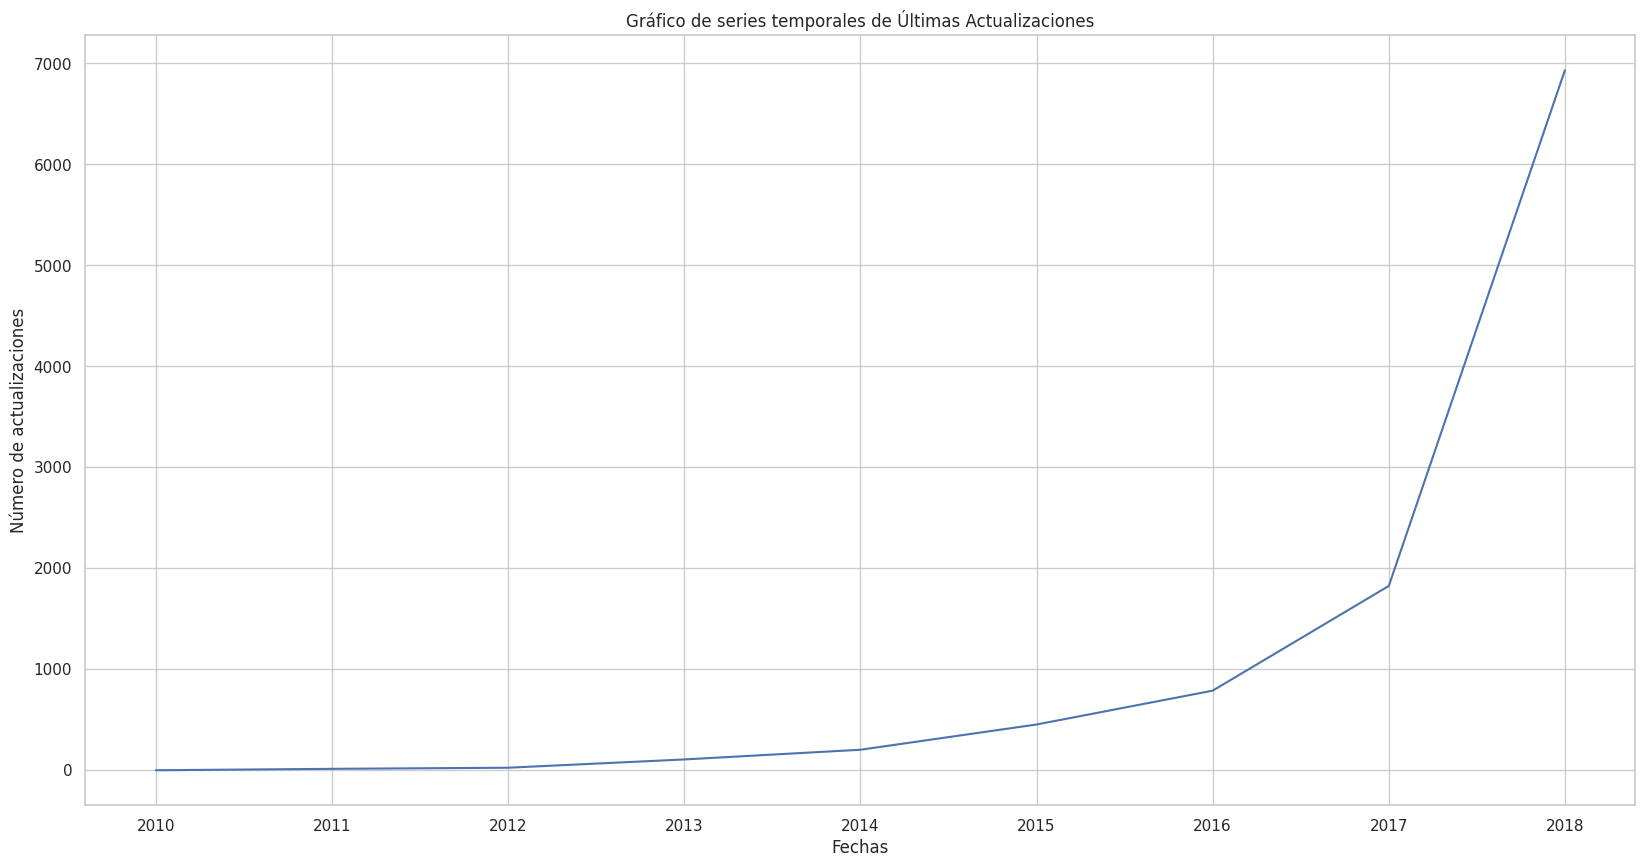

In [80]:
freq = pd.Series()
freq = df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Fechas")
plt.ylabel("Número de actualizaciones")
plt.title("Gráfico de series temporales de Últimas Actualizaciones")

Optamos por eliminar las siguientes características:

- Nombre de la aplicación (App): los nombres de las aplicaciones no aportan valor al modelo.

- Géneros (Genres): la información contenida es redundante con la categoría de función.

- Versión actual: la versión actual de una aplicación carece de relevancia para el modelo.

- Versión de Android: la versión de Android de una aplicación no aporta valor significativo al análisis.

In [81]:
columnas_eliminar = ['App', 'Genres', 'Current Ver', 'Android Ver']

# 5. División de datos para modelado

Dividimos el conjunto de datos en 80% de train y 20% de prueba.

In [82]:
target = 'Rating'

In [83]:
X = df.copy().drop(columnas_eliminar+[target], axis=1)
y = df.copy()[target]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [85]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Updated_Month,Updated_Year
0,ART_AND_DESIGN,159,19.0,10000,Free,0.0,Everyone,1,2018
1,ART_AND_DESIGN,967,14.0,500000,Free,0.0,Everyone,1,2018
2,ART_AND_DESIGN,87510,8.7,5000000,Free,0.0,Everyone,8,2018
3,ART_AND_DESIGN,215644,25.0,50000000,Free,0.0,Teen,6,2018
4,ART_AND_DESIGN,967,2.8,100000,Free,0.0,Everyone,6,2018
...,...,...,...,...,...,...,...,...,...
10836,FAMILY,38,53.0,5000,Free,0.0,Everyone,7,2017
10837,FAMILY,4,3.6,100,Free,0.0,Everyone,7,2018
10838,MEDICAL,3,9.5,1000,Free,0.0,Everyone,1,2017
10839,BOOKS_AND_REFERENCE,114,13.0,1000,Free,0.0,Mature 17+,1,2015


In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10356 non-null  object 
 1   Reviews         10356 non-null  int64  
 2   Size            10356 non-null  float64
 3   Installs        10356 non-null  int64  
 4   Type            10356 non-null  object 
 5   Price           10356 non-null  float64
 6   Content Rating  10356 non-null  object 
 7   Updated_Month   10356 non-null  int64  
 8   Updated_Year    10356 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 809.1+ KB


In [87]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 10356 entries, 0 to 10840
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
10356 non-null  float64
dtypes: float64(1)
memory usage: 161.8 KB


Recordemos que hacer encoding y estandarización antes de modelar ayuda a garantizar que los datos estén en un formato adecuado para el modelado y puede mejorar el rendimiento y la interpretabilidad del modelo resultante.

Por lo tanto hacemos el encoding para las variables cualitativas:

5.1. Label encoding

In [88]:
le_dict = defaultdict()

In [89]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns #Columnas Category, Type y content_rating

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Entrenamos y transformamos el data set de Entrenamiento
    X_train[col] = X_train[col].astype('category') # Convertimos la data transformada de variable numerica a "categoría"

    X_test[col] = le.transform(X_test[col]) # Solo transformamos los datos de testing
    X_test[col] = X_test[col].astype('category') #Convertimos la data transformada de variable numerica a "categoría"

    le_dict[col] = le # guardamos el encoder para columnas individuales

In [90]:
X_train['Category'].value_counts().sort_index()

0       46
1       67
2       42
3      187
4      340
5       46
6      285
7      152
8       97
9       90
10      54
11    1559
12     290
13      96
14     877
15     240
16      65
17      68
18     298
19     110
20     322
21     208
22      50
23     310
24     254
25     326
26     186
27     219
28     288
29     680
30     206
31     149
32      77
Name: Category, dtype: int64

6.1. Estandarización

In [91]:
#Convertimos y agregamos la columna "Last Updated Month" a las variables categóricas
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Hacemos una lista de las variables numéricas para proceder con la esntándarización
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 1948 to 7740
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Category        8284 non-null   category
 1   Reviews         8284 non-null   int64   
 2   Size            8284 non-null   float64 
 3   Installs        8284 non-null   int64   
 4   Type            8284 non-null   category
 5   Price           8284 non-null   float64 
 6   Content Rating  8284 non-null   category
 7   Updated_Month   8284 non-null   category
 8   Updated_Year    8284 non-null   int64   
dtypes: category(4), float64(2), int64(3)
memory usage: 422.7 KB


In [93]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

In [94]:
scaler = StandardScaler()

# Entrenamos y transformamos los datos de entrenamiento
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Solo transformamos los datos de prueba
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [95]:
X_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Updated_Month,Updated_Year
1948,14,-0.143720,1.428843,-0.160552,0,-0.061293,3,8,0.559437
1201,13,-0.090481,-0.334315,-0.111286,0,-0.061293,1,7,0.559437
4700,28,-0.146763,-0.334315,-0.172253,1,0.226698,1,1,-0.338524
9156,11,-0.071331,3.620878,-0.111286,0,-0.061293,1,6,0.559437
3632,32,-0.079929,-0.334315,-0.049704,0,-0.061293,1,8,0.559437
...,...,...,...,...,...,...,...,...,...
6193,24,-0.145016,-0.515397,-0.160552,0,-0.061293,1,6,0.559437
5648,14,-0.137160,1.428843,-0.171637,1,0.154520,4,4,-2.134446
5847,18,-0.147529,-0.334315,-0.172856,1,0.298876,3,7,0.559437
1008,10,-0.137829,-0.334315,-0.111286,0,-0.061293,1,8,0.559437


# 6. Modelado

## Modelos de Regresión

Creando un data frame para evaluación del modelo de regresión.

Utilizaremos los modelos de regresión lineal, vecinos cercanos (KNN), Bosques aletorios de desición (Random Forest) y Bagging para hacer un estudio sobre diferentes modelos y especificar si para este set de datos el uso de regresores es viable.

In [96]:
models = ['Lineal', 'KNN', 'Random Forest', 'Bagging']
datasets = ['Train', 'Test',]
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [97]:
df_metrics_reg

value
model         dataset metric      
Lineal        Train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              Test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           Train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              Test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest Train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              Test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Bagging       Train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              Test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

### Pipelines y parámetros de los modelos de regresión

Siguiendo las buenas prácticas hacemos una evaluación de hiperparámetros para determinar los mejores parámetros que se pueden utilizar para cada modelo.

In [98]:
#Pipeline Regresión lineal
pipeline_lr = Pipeline([
    ('linear', LinearRegression())])


params_lr = [{'linear__fit_intercept': [True, False]
            }]


#Pipeline KNN
pipeline_knn_reg = Pipeline([
    ('knn', KNeighborsRegressor())])


params_knn_reg = [{'knn__n_neighbors': [3, 5, 7, 9],
                   'knn__weights': ['uniform', 'distance'],
                   'knn__leaf_size': [15, 20, 30]}]



#Pipeline Random Forest
pipeline_rf_reg = Pipeline([
    ('rf', RandomForestRegressor(max_depth=2, random_state=0))])


params_rf_reg = [{
                   'rf__n_estimators': [50, 70, 100],
                    'rf__criterion': ['squared_error', 'absolute_error'],
                 }]




### Regresión lineal

Al probar diferentes combinaciones de hiperparámetros, GridSearch ayuda a identificar aquellas que producen el mejor rendimiento del modelo en un conjunto de datos específico. Esto puede conducir a modelos más precisos y generalizables.

No se utilizará validación cruzada para evitar tiempos largos de ejecución al correr el código.

In [99]:
gs_lr = GridSearchCV(pipeline_lr,
                      param_grid=params_lr,
                      # scoring='accuracy',
                      # cv = 5
                      )

In [100]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_lr.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados:
gs_lr.best_params_

#Verificamos el score del modelo
gs_lr.score(X_train, y_train)*100

2.32259920605018

In [101]:
# Entrenamos la búsqueda en rejilla para el conjunto de prueba:
gs_lr.fit(X_test, y_test)

# Imprimimos los mejores hiperparámetros encontrados:
gs_lr.best_params_

#Verificamos el score del modelo
gs_lr.score(X_test, y_test)*100

4.290507626516849

In [102]:
pd.DataFrame(gs_lr.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linear__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022973,0.006476,0.005988,0.002685,True,{'linear__fit_intercept': True},0.038199,0.006375,0.044182,0.007998,0.052919,0.029935,0.019162,1
1,0.015425,0.003439,0.006158,0.001983,False,{'linear__fit_intercept': False},-5.053530,-5.012409,-5.980578,-5.521705,-5.186636,-5.350972,0.362121,2


En este caso el mejor modelo indica la selección de parámetros por defecto donde el fit_intercept está como "True", esto indica que el modelo de regresión lineal ajustará tanto el coeficiente de la pendiente como el término de intercepción. Esto significa que el modelo se ajustará a una línea recta que no necesariamente pasa por el origen.

Hacemos la regresión lineal con los valores predeterminados.

In [103]:
#Usamos los parametros por defecto
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
#Scores de los modelos
df_metrics_reg.loc['Lineal', 'Train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Lineal', 'Test', 'R2'] = lr.score(X_test, y_test)


In [105]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#Error absoluto
df_metrics_reg.loc['Lineal', 'Train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Lineal', 'Test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

#Error cuadratico medio
df_metrics_reg.loc['Lineal', 'Train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Lineal', 'Test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

Recordemos:
El Error absoluto (MAE) y el error cuadrático medio (RMSE) proporcionan información complementaria sobre la calidad de las predicciones de un modelo de regresión. El MAE es útil para obtener una medida promedio de los errores sin considerar su magnitud, mientras que el RMSE es útil cuando se desea penalizar más los errores grandes y se está dispuesto a asumir la sensibilidad a los valores atípicos.

### KNN Regresión

Buscamos los mejores parámetros con gridsearch (busqueda de rejilla)

In [106]:
gs_knn_lr = GridSearchCV(pipeline_knn_reg,
                     param_grid=params_knn_reg)

In [107]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_knn_lr.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados:
gs_knn_lr.best_params_

#Verificamos el score del modelo
gs_knn_lr.score(X_train, y_train)*100

18.449260508316755

In [108]:
# Entrenamos la búsqueda en rejilla para el conjunto de prueba:
gs_knn_lr.fit(X_test, y_test)

# Imprimimos los mejores hiperparámetros encontrados:
gs_knn_lr.best_params_

#Verificamos el score del modelo
gs_knn_lr.score(X_test, y_test)*100

15.9543594993249

In [109]:
pd.DataFrame(gs_knn_lr.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__leaf_size,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.005245,0.000180,0.011581,0.000789,15,9,uniform,"{'knn__leaf_size': 15, 'knn__n_neighbors': 9, ...",0.006071,-0.089389,-0.054066,-0.101719,-0.138339,-0.075488,0.048872,1
22,0.007503,0.000452,0.014982,0.000359,30,9,uniform,"{'knn__leaf_size': 30, 'knn__n_neighbors': 9, ...",0.006071,-0.089389,-0.054066,-0.101719,-0.138339,-0.075488,0.048872,1
14,0.007807,0.000354,0.016842,0.000766,20,9,uniform,"{'knn__leaf_size': 20, 'knn__n_neighbors': 9, ...",0.006071,-0.089389,-0.054066,-0.101719,-0.138339,-0.075488,0.048872,1
20,0.007925,0.000530,0.015070,0.001060,30,7,uniform,"{'knn__leaf_size': 30, 'knn__n_neighbors': 7, ...",0.008301,-0.105078,-0.064031,-0.130836,-0.186175,-0.095564,0.065310,4
4,0.005225,0.000221,0.010839,0.000923,15,7,uniform,"{'knn__leaf_size': 15, 'knn__n_neighbors': 7, ...",0.008301,-0.105078,-0.064031,-0.130836,-0.186175,-0.095564,0.065310,4
12,0.009262,0.001212,0.016977,0.001389,20,7,uniform,"{'knn__leaf_size': 20, 'knn__n_neighbors': 7, ...",0.008301,-0.105078,-0.064031,-0.130836,-0.186175,-0.095564,0.065310,4
23,0.008728,0.001980,0.016567,0.002862,30,9,distance,"{'knn__leaf_size': 30, 'knn__n_neighbors': 9, ...",0.028893,-0.141127,-0.047006,-0.140521,-0.182595,-0.096471,0.076831,7
7,0.007533,0.002193,0.012907,0.002172,15,9,distance,"{'knn__leaf_size': 15, 'knn__n_neighbors': 9, ...",0.028893,-0.141127,-0.047006,-0.140521,-0.182595,-0.096471,0.076831,7
15,0.007871,0.000088,0.016427,0.000455,20,9,distance,"{'knn__leaf_size': 20, 'knn__n_neighbors': 9, ...",0.028893,-0.141127,-0.047006,-0.140521,-0.182595,-0.096471,0.076831,7
21,0.008253,0.001762,0.015063,0.000791,30,7,distance,"{'knn__leaf_size': 30, 'knn__n_neighbors': 7, ...",0.014440,-0.170109,-0.076726,-0.174272,-0.222977,-0.125929,0.084654,10


Segun el la busqueda de tipo rejilla estos son los mejores parametros para este modelo de KNN:

- Numero de Vecinos: 9
- Peso: Uniform
- Tamaño de la hoja (leaf): 15


Para dar contexto, esto significa:

1) Número de Vecinos (Number of Neighbors):

- Especifica la cantidad de vecinos más cercanos que se considerarán al realizar una predicción para una nueva instancia.
- En este caso, se establece en 9, lo que significa que se tomarán en cuenta los 9 vecinos más cercanos para realizar una predicción.

2) Peso (Weight):

- Determina cómo se ponderan las contribuciones de los vecinos cercanos durante la predicción.
- Cuando se establece en "Uniforme" (Uniform), todos los vecinos tienen el mismo peso en la predicción.
- Otro valor común para este parámetro es "Distance" (Distancia), donde los vecinos más cercanos tienen un peso mayor en la predicción que los vecinos más lejanos.

3) Tamaño de la Hoja (Leaf Size):

- Controla el tamaño de las hojas del árbol de búsqueda de vecinos más cercanos, que es una estructura de datos utilizada para encontrar eficientemente los vecinos más cercanos.
- Un valor mayor de tamaño de hoja puede mejorar la eficiencia computacional, pero puede comprometer la calidad de las predicciones.
- En este caso, se establece en 15, lo que indica que se utilizarán hojas de tamaño 15 en el árbol de búsqueda de vecinos más cercanos.
                 


In [110]:
knn_best = KNeighborsRegressor(n_neighbors=9, weights='uniform', leaf_size=15)
knn_best.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=15, n_neighbors=9)

In [111]:
#Score del modelo
df_metrics_reg.loc['KNN', 'Train', 'R2'] = knn_best.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'Test', 'R2'] = knn_best.score(X_test, y_test)

In [112]:
y_train_pred_knn = knn_best.predict(X_train)
y_test_pred_knn = knn_best.predict(X_test)

df_metrics_reg.loc['KNN', 'Train', 'MAE'] = mean_absolute_error(y_train, y_train_pred_knn)
df_metrics_reg.loc['KNN', 'Test', 'MAE'] = mean_absolute_error(y_test, y_test_pred_knn)

df_metrics_reg.loc['KNN', 'Train', 'RMSE'] = mean_squared_error(y_train, y_train_pred_knn, squared=False)
df_metrics_reg.loc['KNN', 'Test', 'RMSE'] = mean_squared_error(y_test, y_test_pred_knn, squared=False)

### Random Forest Regresión

Hacemos una busqueda en rejilla para determinar los mejores hiperparámetros para este modelo de bosques aleatorios.

In [113]:
gs_rf_lr = GridSearchCV(pipeline_rf_reg,
                     param_grid=params_rf_reg)

In [114]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_rf_lr.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados:
gs_rf_lr.best_params_

#Verificamos el score del modelo
gs_rf_lr.score(X_train, y_train)*100

6.308301456926191

In [115]:
# Entrenamos la búsqueda en rejilla para el conjunto de prueba:
gs_rf_lr.fit(X_test, y_test)

# Imprimimos los mejores hiperparámetros encontrados:
gs_rf_lr.best_params_

#Verificamos el score del modelo
gs_rf_lr.score(X_test, y_test)*100

9.613440239533311

In [116]:
pd.DataFrame(gs_rf_lr.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__criterion,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.209625,0.010811,0.007218,0.000574,squared_error,100,"{'rf__criterion': 'squared_error', 'rf__n_esti...",0.088708,0.075205,0.070936,0.112712,0.065112,0.082535,0.016974,1
1,0.155698,0.010814,0.007203,0.002240,squared_error,70,"{'rf__criterion': 'squared_error', 'rf__n_esti...",0.088902,0.075841,0.070415,0.111714,0.065483,0.082471,0.016579,2
0,0.157382,0.095207,0.005637,0.000773,squared_error,50,"{'rf__criterion': 'squared_error', 'rf__n_esti...",0.088881,0.076977,0.070816,0.109326,0.065622,0.082324,0.015570,3
5,2.512153,0.356623,0.008548,0.001620,absolute_error,100,"{'rf__criterion': 'absolute_error', 'rf__n_est...",0.019557,0.031004,0.006841,-0.035643,-0.006004,0.003151,0.023010,4
4,1.629244,0.117457,0.006140,0.000610,absolute_error,70,"{'rf__criterion': 'absolute_error', 'rf__n_est...",0.017972,0.031172,0.008143,-0.037130,-0.006838,0.002664,0.023456,5
3,1.334508,0.258504,0.006716,0.001713,absolute_error,50,"{'rf__criterion': 'absolute_error', 'rf__n_est...",0.018707,0.030099,0.008011,-0.041118,-0.008875,0.001365,0.024820,6


Según el la busqueda en rejilla estos son los mejores parametros para este modelo de Random Forest:

- Numero de estimadores = 100
- Criterio = error cuadratico (squared error)

Para dar contexto, esto significa:

1) Número de Estimadores (Number of Estimators):

- Indica la cantidad de árboles de decisión que se crearán en el bosque.
- En este caso, se establece en 100, lo que significa que se construirán 100 árboles de decisión independientes.

2) Criterio (Criterion):

- Define la función utilizada para medir la calidad de una división en un nodo del árbol.
- "Squared Error" (Error Cuadrático) se refiere al criterio de medida de impureza que se utiliza para calcular la ganancia de información durante la construcción del árbol.
- Este criterio mide el error cuadrático medio entre las predicciones y las etiquetas reales, y se utiliza comúnmente en problemas de regresión.
- Otro criterio común es "MSE" (Mean Squared Error), que es equivalente a "Squared Error".



In [117]:
rf_best = RandomForestRegressor(max_depth=2, random_state=0, n_estimators = 100, criterion = 'squared_error')
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [118]:
#Score del modelo
df_metrics_reg.loc['Random Forest', 'Train', 'R2'] = rf_best.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'Test', 'R2'] = rf_best.score(X_test, y_test)

In [119]:
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

df_metrics_reg.loc['Random Forest', 'Train', 'MAE'] = mean_absolute_error(y_train, y_train_pred_rf)
df_metrics_reg.loc['Random Forest', 'Test', 'MAE'] = mean_absolute_error(y_test, y_test_pred_rf)

df_metrics_reg.loc['Random Forest', 'Train', 'RMSE'] = mean_squared_error(y_train, y_train_pred_rf, squared=False)
df_metrics_reg.loc['Random Forest', 'Test', 'RMSE'] = mean_squared_error(y_test, y_test_pred_rf, squared=False)

### Bagging regresión

El Bagging Regresor, abreviatura de Bootstrap Aggregating Regressor, es un método de ensamble utilizado en aprendizaje automático para mejorar la precisión y la estabilidad de los modelos de regresión. Se basa en la técnica de bagging, que implica la construcción de múltiples modelos de regresión a partir de muestras de datos de entrenamiento seleccionadas al azar con reemplazo.

En palabras más sencillas, imagina que estás tratando de tomar una decisión importante, pero no estás seguro de qué camino seguir. En lugar de confiar en una sola persona para obtener consejos, decides preguntar a varias personas y luego tomar una decisión basada en sus opiniones combinadas.

Bagging funciona de manera similar en el aprendizaje automático. En lugar de depender de un solo modelo para hacer predicciones, se crean múltiples modelos, cada uno entrenado en un conjunto de datos ligeramente diferente. Estos conjuntos de datos se forman tomando muestras aleatorias con reemplazo del conjunto de datos original.

Luego, cuando necesitas hacer una predicción, le pides a cada modelo individual que haga su predicción. Luego, combinas estas predicciones de alguna manera para obtener una predicción final. Esto puede implicar tomar el promedio de todas las predicciones (en el caso de la regresión) o usar votación (en el caso de la clasificación) para decidir la clase más común.

Este código está creando un regresor Bagging, que es un tipo de ensemble learning, específicamente utilizando la técnica de bagging (Bootstrap Aggregating). Veamos qué significan los parámetros:

- base_estimator=LinearRegression(): Especifica el estimador base que se utilizará en cada modelo individual dentro del ensamble. En este caso, el estimador base es una regresión lineal (LinearRegression()).

- n_estimators=200: Indica el número de modelos que se crearán en el ensamble. En este caso, se están creando 200 modelos.

In [120]:
#Creo un modelo de regresión con bagging
bagging_lr = BaggingRegressor(base_estimator=LinearRegression(),
                            n_estimators=200,
                            random_state=19).fit(X_train, y_train)

bagging_lr_predict = bagging_lr.predict(X_train)
print('El Accuracy de entrenamiento usando Bagging con Linear Regression es de: {}'.format(bagging_lr.score(X_train, y_train)*100))

bagging_lr_predict = bagging_lr.predict(X_test)
print('El Accuracy de prueba usando Bagging con Linear Regression es de: {}'.format(bagging_lr.score(X_test, y_test)*100))

El Accuracy de entrenamiento usando Bagging con Linear Regression es de: 2.321980095413445
El Accuracy de prueba usando Bagging con Linear Regression es de: 3.664511581828145


In [121]:
df_metrics_reg.loc['Bagging', 'Train', 'R2'] = bagging_lr.score(X_train, y_train)
df_metrics_reg.loc['Bagging', 'Test', 'R2'] = bagging_lr.score(X_test, y_test)

In [122]:
y_train_pred_bagg = bagging_lr.predict(X_train)
y_test_pred_bagg = bagging_lr.predict(X_test)

#Error absoluto medio
df_metrics_reg.loc['Bagging', 'Train', 'MAE'] = mean_absolute_error(y_train, y_train_pred_bagg)
df_metrics_reg.loc['Bagging', 'Test', 'MAE'] = mean_absolute_error(y_test, y_test_pred_bagg)

#Error cuadratico medio
df_metrics_reg.loc['Bagging', 'Train', 'RMSE'] = mean_squared_error(y_train, y_train_pred_bagg, squared=False)
df_metrics_reg.loc['Bagging', 'Test', 'RMSE'] = mean_squared_error(y_test, y_test_pred_bagg, squared=False)

### Evaluación de las Regresiones

In [123]:
df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Lineal        Train   RMSE    0.478
                      MAE     0.319
                      R2      0.023
              Test    RMSE    0.483
                      MAE     0.327
                      R2      0.037
KNN           Train   RMSE    0.437
                      MAE     0.297
                      R2      0.184
              Test    RMSE    0.498
                      MAE     0.342
                      R2     -0.022
Random Forest Train   RMSE    0.468
                      MAE     0.309
                      R2      0.063
              Test    RMSE    0.472
                      MAE     0.314
                      R2      0.081
Bagging       Train   RMSE    0.478
                      MAE     0.319
                      R2      0.023
              Test    RMSE    0.483
                      MAE     0.327
                      R2      0.037

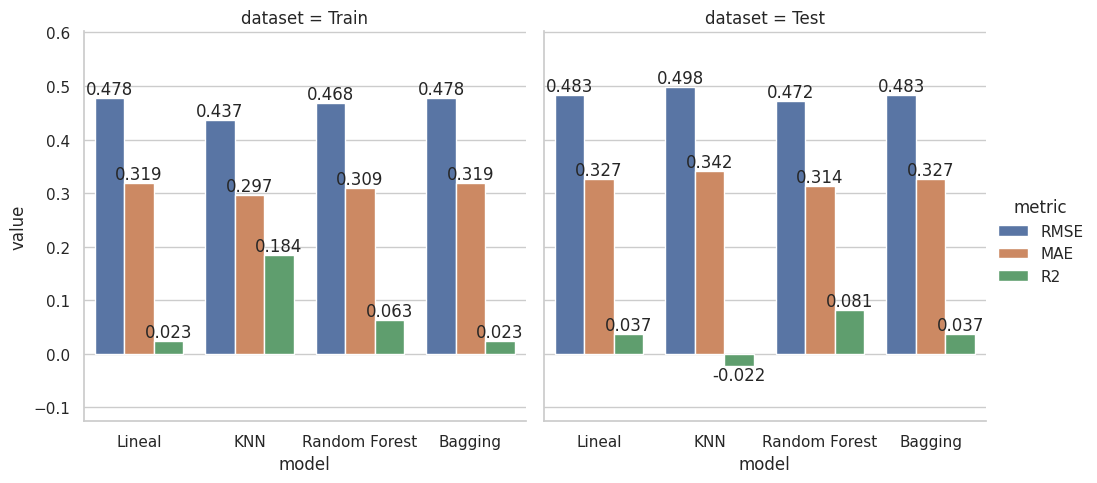

In [124]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()


¡Las predicciones de regresión no se sostienen muy bien!

Podemos interpretar que el conjunto de datos no es adecuado para el problema de regresión.

## Modelos de Clasificación

Creamos un data frame para evaluación del modelo de clasificación.

Utilizaremos los modelos de regresión logística, vecinos cercanos (KNN), Bosques aletorios de desición (Random Forest) y Bagging para hacer un estudio sobre diferentes modelos y especificar si para este set de datos es mejor el uso de modelos de clasificación dado que los modelos de regresión no se sostienen bien.

In [125]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [126]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Bagging']
datasets = ['Train', 'Test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [127]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression Train          NaN
                    Test           NaN
KNN                 Train          NaN
                    Test           NaN
Random Forest       Train          NaN
                    Test           NaN
Bagging             Train          NaN
                    Test           NaN

### Pipeline y paámetros de los modelos de clasificación

Al igual que en los modelos de regresión, hacemos una evaluación de hiperparámetros para determinar los mejores parámetros que se pueden utilizar para cada modelo.

In [128]:
# Pipeline Regresión Logística
pipeline_lr_clf = Pipeline([
    ('logistic', LogisticRegression())
])

params_lr_clf = [{
              # 'logistic__penalty': ['l1', 'l2'],
              'logistic__C': [0.01, 0.1, 1.0, 10, 100]}]

# Pipeline KNN
pipeline_knn_clf = Pipeline([
    ('knn', KNeighborsClassifier())
])

params_knn_clf = [{'knn__n_neighbors': [3, 5, 7, 9],
                   'knn__weights': ['uniform', 'distance'],
                   'knn__leaf_size': [15, 20, 30]}]

# Pipeline Random Forest
pipeline_rf_clf = Pipeline([
    ('rf', RandomForestClassifier())
])

params_rf_clf = [{'rf__n_estimators': [50, 70, 100],
                  'rf__criterion': ['gini', 'entropy']}]

# Pipeline Bagging
pipeline_bagging_clf = Pipeline([
    ('bagging', BaggingClassifier())
])

params_bagging_clf = [{'bagging__n_estimators': [10, 50, 100],
                       'bagging__max_samples': [0.5, 0.7, 1.0],
                       'bagging__max_features': [0.5, 0.7, 1.0]}]

### Regresión Logística

Recordemos, al probar diferentes combinaciones de hiperparámetros, GridSearch (Busqueda enrejilla) ayuda a identificar aquellas que producen el mejor rendimiento del modelo en un conjunto de datos específico.

In [129]:
gs_lr_clf = GridSearchCV(pipeline_lr_clf,
                      param_grid=params_lr_clf,
                      # scoring='accuracy',
                      # cv = 5
                      )

In [130]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_lr_clf.fit(X_train, y_train_int)

# Imprimimos los mejores hiperparámetros encontrados:
gs_lr_clf.best_params_

#Verificamos el score del modelo
gs_lr_clf.score(X_train, y_train_int)

0.7892322549492998

In [131]:
# Entrenamos la búsqueda en rejilla para el conjunto de prueba:
gs_lr_clf.fit(X_test, y_test_int)

# Imprimimos los mejores hiperparámetros encontrados:
gs_lr_clf.best_params_

#Verificamos el score del modelo
gs_lr_clf.score(X_test, y_test_int)

0.7712355212355212

In [132]:
pd.DataFrame(gs_lr_clf.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062575,0.011537,0.003433,0.000663,0.01,{'logistic__C': 0.01},0.771084,0.771084,0.772947,0.770531,0.770531,0.771236,0.000891,1
2,0.055675,0.003430,0.002939,0.000207,1.0,{'logistic__C': 1.0},0.771084,0.768675,0.772947,0.768116,0.770531,0.770271,0.001737,2
1,0.057678,0.005159,0.003150,0.000364,0.1,{'logistic__C': 0.1},0.771084,0.771084,0.770531,0.768116,0.770531,0.770269,0.001105,3
3,0.061574,0.005671,0.003435,0.000158,10,{'logistic__C': 10},0.771084,0.768675,0.770531,0.768116,0.770531,0.769788,0.001168,4
4,0.058773,0.006720,0.003518,0.000358,100,{'logistic__C': 100},0.771084,0.768675,0.770531,0.758454,0.770531,0.767855,0.004771,5


En este caso utilizaremos los hiperparámetros por defecto de la regresión logística a diferencia del hiperparámetro C (regularización inversa). La cual se utiliza para evitar el sobreajuste del modelo a los datos de entrenamiento al penalizar los coeficientes de las características, el cual será igual a 0.01

Procedemos como sigue:

In [133]:
lr_clf = LogisticRegression(C=0.01)
lr_clf.fit(X_train, y_train_int)

LogisticRegression(C=0.01)

In [134]:
df_metrics_clf.loc['Logistic Regression', 'Train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'Test'] = lr_clf.score(X_test, y_test_int)

Inentamos hacer la matriz de confusión y clasification report

In [135]:
# y_train_predict = lr_clf.predict(X_train)
# y_test_predict = lr_clf.predict(X_test)


Es dificil hacer una matriz de confusion cuando hay demasiadas clases

In [136]:
# cm_lr_clf = confusion_matrix(y_train_int, y_train_predict)
# cm_lr_clf

In [137]:
# cm_lr_clf_t = confusion_matrix(y_test_int, y_test_predict)
# cm_lr_clf_t

In [138]:
# sns.heatmap(cm_lr_clf, annot= True, fmt= '.0f', cmap= 'winter')
# plt.title('Matriz de confusión')
# plt.xlabel('Valor predecido')
# plt.ylabel('Valor real')
# plt.show()

De igual manera para el clasification report (parece no viable)

In [139]:
# print(classification_report(y_train_int, y_train_predict))

En situaciones donde el número de clases es demasiado grande, el uso directo de la matriz de confusión y el classification report puede volverse problemático debido a la dificultad para visualizar y comprender la información, así como a la posibilidad de una sobrecarga de datos.

### KNN Clasificación

Buscamos los mejores parámetros con gridsearch (busqueda de rejilla)

In [140]:
gs_knn_clf = GridSearchCV(pipeline_knn_clf,
                     param_grid=params_knn_clf)

In [141]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_knn_clf.fit(X_train, y_train_int)

# Imprimimos los mejores hiperparámetros encontrados:
gs_knn_clf.best_params_

#Verificamos el score del modelo
gs_knn_clf.score(X_train, y_train_int)

0.7953887011105746

In [142]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_knn_clf.fit(X_test, y_test_int)

# Imprimimos los mejores hiperparámetros encontrados:
gs_knn_clf.best_params_

#Verificamos el score del modelo
gs_knn_clf.score(X_test, y_test_int)

0.7765444015444015

In [143]:
pd.DataFrame(gs_knn_clf.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__leaf_size,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.008752,0.000963,0.046980,0.001531,15,9,uniform,"{'knn__leaf_size': 15, 'knn__n_neighbors': 9, ...",0.746988,0.739759,0.753623,0.763285,0.760870,0.752905,0.008712,1
22,0.004678,0.000180,0.029067,0.002130,30,9,uniform,"{'knn__leaf_size': 30, 'knn__n_neighbors': 9, ...",0.746988,0.739759,0.753623,0.763285,0.760870,0.752905,0.008712,1
14,0.008887,0.000702,0.051112,0.002905,20,9,uniform,"{'knn__leaf_size': 20, 'knn__n_neighbors': 9, ...",0.746988,0.739759,0.753623,0.763285,0.760870,0.752905,0.008712,1
20,0.005320,0.001146,0.031632,0.005016,30,7,uniform,"{'knn__leaf_size': 30, 'knn__n_neighbors': 7, ...",0.742169,0.744578,0.741546,0.753623,0.739130,0.744209,0.005016,4
4,0.008876,0.000679,0.050696,0.001971,15,7,uniform,"{'knn__leaf_size': 15, 'knn__n_neighbors': 7, ...",0.742169,0.744578,0.741546,0.753623,0.739130,0.744209,0.005016,4
12,0.008797,0.001524,0.044871,0.000667,20,7,uniform,"{'knn__leaf_size': 20, 'knn__n_neighbors': 7, ...",0.742169,0.744578,0.741546,0.753623,0.739130,0.744209,0.005016,4
23,0.005217,0.000890,0.010877,0.000849,30,9,distance,"{'knn__leaf_size': 30, 'knn__n_neighbors': 9, ...",0.746988,0.715663,0.746377,0.727053,0.734300,0.734076,0.011887,7
7,0.008474,0.000478,0.017957,0.000313,15,9,distance,"{'knn__leaf_size': 15, 'knn__n_neighbors': 9, ...",0.746988,0.715663,0.746377,0.727053,0.734300,0.734076,0.011887,7
15,0.009716,0.000581,0.020838,0.000658,20,9,distance,"{'knn__leaf_size': 20, 'knn__n_neighbors': 9, ...",0.746988,0.715663,0.746377,0.727053,0.734300,0.734076,0.011887,7
21,0.005533,0.001014,0.010457,0.000510,30,7,distance,"{'knn__leaf_size': 30, 'knn__n_neighbors': 7, ...",0.742169,0.715663,0.734300,0.722222,0.717391,0.726349,0.010246,10


Mejor modelo de KNN Clasificación

Los mejores hiperparámetros establecidos para este modelo son:


- n_neighbors: 9
- weights: Uniform
- leaf_size: 15

Recordemos:

- n_neighbors: Este parámetro especifica el número de vecinos que se utilizarán para clasificar un punto de datos nuevo. En este caso, n_neighbors=9 significa que se considerarán los 9 vecinos más cercanos para determinar la clase del punto de datos nuevo.

- weights: Este parámetro determina cómo se ponderan las contribuciones de los vecinos en la clasificación. Tiene dos opciones:

'uniform': Todos los vecinos tienen el mismo peso en la clasificación.

'distance': Los vecinos más cercanos tienen un peso mayor que los vecinos más lejanos, según la inversa de su distancia.

En este caso, weights='uniform' indica que todos los vecinos tienen el mismo peso en la clasificación.

- leaf_size: Este parámetro controla el tamaño de la hoja del árbol que se utiliza para realizar la búsqueda de vecinos. Una hoja más grande puede resultar en una búsqueda más rápida, pero a costa de una mayor memoria. En este caso, leaf_size=15 especific

In [144]:
knn_clf = KNeighborsClassifier(n_neighbors=9, weights='uniform', leaf_size=15)
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier(leaf_size=15, n_neighbors=9)

In [145]:
df_metrics_clf.loc['KNN', 'Train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'Test'] = knn_clf.score(X_test, y_test_int)

Al igual que la regresión logística no se procederá con hacer la matriz de confusión y clasification report por el número grande de clases presente en el data set.

### Random Forest Clasificación

Hacemos una busqueda en rejilla para determinar los mejores hiperparámetros para este modelo de bosques aleatorios.

In [146]:
gs_rf_clf = GridSearchCV(pipeline_rf_clf,
                     param_grid=params_rf_clf)

In [147]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_rf_clf.fit(X_train, y_train_int)

# Imprimimos los mejores hiperparámetros encontrados:
gs_rf_clf.best_params_

#Verificamos el score del modelo
gs_rf_clf.score(X_train, y_train_int)

1.0

In [148]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_rf_clf.fit(X_test, y_test_int)

# Imprimimos los mejores hiperparámetros encontrados:
gs_rf_clf.best_params_

#Verificamos el score del modelo
gs_rf_clf.score(X_test, y_test_int)

1.0

In [149]:
pd.DataFrame(gs_rf_clf.cv_results_).sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__criterion,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.355113,0.009164,0.017281,0.000414,gini,100,"{'rf__criterion': 'gini', 'rf__n_estimators': ...",0.759036,0.725301,0.748792,0.763285,0.756039,0.750491,0.013453,1
4,0.339772,0.061739,0.016059,0.003025,entropy,70,"{'rf__criterion': 'entropy', 'rf__n_estimators...",0.746988,0.730120,0.751208,0.756039,0.751208,0.747113,0.008966,2
3,0.205364,0.009837,0.010537,0.000381,entropy,50,"{'rf__criterion': 'entropy', 'rf__n_estimators...",0.754217,0.727711,0.748792,0.756039,0.748792,0.747110,0.010121,3
5,0.636060,0.027503,0.024235,0.004042,entropy,100,"{'rf__criterion': 'entropy', 'rf__n_estimators...",0.754217,0.727711,0.748792,0.751208,0.751208,0.746627,0.009613,4
1,0.248055,0.005595,0.014557,0.002030,gini,70,"{'rf__criterion': 'gini', 'rf__n_estimators': 70}",0.742169,0.706024,0.743961,0.763285,0.756039,0.742296,0.019737,5
0,0.186514,0.009058,0.011078,0.001487,gini,50,"{'rf__criterion': 'gini', 'rf__n_estimators': 50}",0.761446,0.718072,0.756039,0.731884,0.743961,0.742280,0.015834,6


Los mejores hiperparámetros establecidos para este modelo son:

n_estimators': 50

criterion': gini

Recordemos:

- n_estimators: Este parámetro indica el número de árboles de decisión que se utilizarán en el bosque. En este caso, n_estimators=50 significa que se construirán 50 árboles en el bosque.

- criterion: Este parámetro especifica la función para medir la calidad de una división en un nodo del árbol. Las dos opciones principales son:

'gini': Utiliza el índice Gini para medir la pureza de los nodos. El índice Gini es una medida de impureza que se utiliza para clasificación.

'entropy': Utiliza la ganancia de información (entropía) para medir la calidad de la división. La entropía es otra medida de impureza que también se utiliza para clasificación.

En este caso, criterion='gini' indica que se utilizará el índice Gini para medir la calidad de las divisiones en los árboles de decisión del bosque.

In [150]:
rf_clf = RandomForestClassifier(n_estimators=50, criterion='gini')
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier(n_estimators=50)

In [151]:
df_metrics_clf.loc['Random Forest', 'Train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'Test'] = rf_clf.score(X_test, y_test_int)

Descartaremos el uso de la matriz de confusión y clasification report para este modelo también.

### Bagging Clasification

Al igual que en el modelo de regresión utilizaremos bagging para claificación con los siguientes parámetros

In [152]:
#Creo un modelo de regresión con bagging
bagging_clf = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                            n_estimators=100,
                            random_state=19).fit(X_train, y_train_int)

bagging_clf_predict = bagging_clf.predict(X_train)
print('El Accuracy de entrenamiento usando Bagging con KNN es de: {}'.format(bagging_clf.score(X_train, y_train_int)))

bagging_clf_predict = bagging_clf.predict(X_test)
print('El Accuracy de prueba usando Bagging con KNN es de: {}'.format(bagging_clf.score(X_test, y_test_int)))

El Accuracy de entrenamiento usando Bagging con KNN es de: 0.8151859005311444
El Accuracy de prueba usando Bagging con KNN es de: 0.7543436293436293


Recordemos:

- base_estimator: Este parámetro especifica el estimador base que se utilizará en cada uno de los clasificadores en el conjunto. En este caso, se utiliza KNeighborsClassifier() como estimador base. Bagging funciona entrenando múltiples clasificadores en diferentes subconjuntos de datos creados a partir del conjunto de entrenamiento original, y este estimador base es el modelo que se utilizará para cada uno de estos clasificadores.

- n_estimators: Este parámetro indica el número de estimadores en el conjunto (es decir, el número de clasificadores). En este caso, se establece en n_estimators=100, lo que significa que se crearán 100 clasificadores en el conjunto de Bagging.

- random_state: Este parámetro se utiliza para controlar la aleatoriedad del proceso de ajuste. Proporcionar un valor entero al parámetro random_state garantiza que el proceso de entrenamiento sea reproducible, es decir, se generará el mismo conjunto de clasificadores cada vez que se ajuste el modelo. En este caso, random_state=19 se utiliza para establecer una semilla aleatoria específica, lo que asegura que el modelo producirá resultados consistentes y reproducibles.

In [153]:
df_metrics_clf.loc['Bagging', 'Train'] = bagging_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Bagging', 'Test'] = bagging_clf.score(X_test, y_test_int)

Al igual que los modelos anteriores no se utilizará la matriz de confusión ni clasification report dado el gran número de clases posibles.

### Evaluación de las Clasificaciones

In [154]:
#Redondeando y convirtiendo las precisiones a porcentajes
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression Train         78.92
                    Test          77.17
KNN                 Train         79.54
                    Test          75.05
Random Forest       Train         99.98
                    Test          77.90
Bagging             Train         81.52
                    Test          75.43

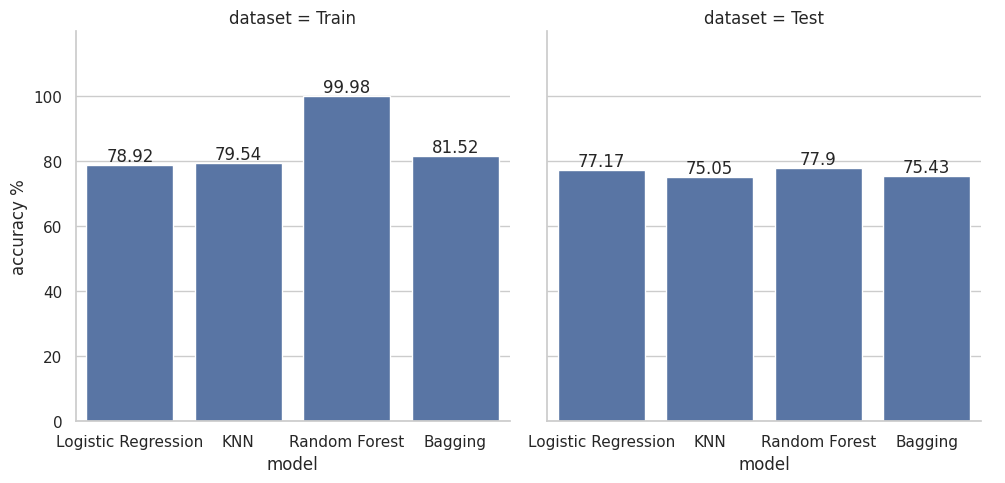

In [189]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Iterar a través de los ejes
for ax in g.axes.ravel():
    # agregamos las anotaciones
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

Después de comparar con los modelos de regresión, ¡está claro que obtendríamos mejores resultados con la clasificación!

## Predicción del modelo seleccionado

In [186]:
# Crear un diccionario con las variables predictoras y espacios para colocar datos nuevos
predictores = {
    'Category': None,
    'Reviews': None,
    'Size': None,
    'Installs': None,
    'Type': None,
    'Price': None,
    'Content Rating': None,
    'Updated_Month': None,
    'Updated_Year': None
}

# Función para predecir el rating usando el modelo de random forest de clasificación
def predecir_rating(datos):
    # Actualizar el diccionario con los datos nuevos
    predictores.update(datos)

    # Convertir el diccionario a un DataFrame
    df_prediccion = pd.DataFrame(predictores, index=[0])

    # Aplicar Label Encoding a las variables tipo "Category"
    le = LabelEncoder()
    for col in ['Category', 'Type', 'Content Rating']:
        df_prediccion[col] = le.fit_transform(df_prediccion[col])

    # Estandarizar las variables numéricas
    scaler = StandardScaler()
    num_cols = ['Reviews', 'Size', 'Installs', 'Price', 'Updated_Month', 'Updated_Year']
    df_prediccion[num_cols] = scaler.fit_transform(df_prediccion[num_cols])

    # Predecir el rating (aquí asumiendo que 'rf_clf' es tu modelo ya entrenado)
    prediccion = rf_clf.predict(df_prediccion)[0]

    # Devolver la predicción
    return prediccion

# Ejemplo de uso
datos_nuevos = {
    'Category': 'BUSINESS',
    'Reviews': 7699,
    'Size': 4.2,
    'Installs': 500000,
    'Type': 'Free',
    'Price': 0.0,
    'Content Rating': 'Everyone 10+',
    'Updated_Month': 7,
    'Updated_Year': 2018
}

prediccion = predecir_rating(datos_nuevos)

print(f"Predicción del rating:  {prediccion:.2f}")

Predicción del rating:  4.00


#Conclusión


Este conjunto de datos está diseñado más para realizar un análisis exploratorio que para desarrollar un modelo de predicción.

**EDA**

- **Diversidad en el Mercado:** Se observa una diversidad significativa en el mercado de aplicaciones, con un marcado énfasis en aplicaciones orientadas a la familia y juegos.

- **Valoraciones Positivas:** La distribución de las valoraciones de los usuarios indica una preferencia generalizada y un alto grado de satisfacción, con una proporción considerable de aplicaciones que reciben valoraciones favorables.

- **Subjetividad de las Valoraciones:** Es importante destacar que las valoraciones de los usuarios tienden a ser más subjetivas que objetivas, lo que puede limitar la precisión de las predicciones con los datos disponibles en este conjunto.

- **Altas Instalaciones:** Se observa que muchas aplicaciones han sido instaladas más de un millón de veces, lo que sugiere una popularidad generalizada entre los usuarios.

- **Actualizaciones Regulares:** La presencia de un número significativo de actualizaciones, especialmente alrededor de agosto de 2018, indica un interés continuo por parte de los desarrolladores en mejorar y actualizar las aplicaciones.

- **Tendencia hacia Aplicaciones Gratuitas:** Predomina la oferta de aplicaciones gratuitas, reflejando la tendencia prevalente de proporcionar servicios sin costo a los usuarios.

- **Correlaciones:** El análisis del conjunto de datos de Google Play Store ha demostrado que existe una correlación débil entre los Ratings y otros atributos de la aplicación, como el tamaño, las instalaciones, las reseñas y el precio. Descubrimos que había una correlación positiva moderada entre el número de instalaciones y la calificación, lo que sugiere que las aplicaciones mejor calificadas tienden a tener más instalaciones.


**INFORMACIÓN ADICIONAL**

Verificamos que los modelos de clasificación se ajustan más a este tipo de datos siento el modelo de arboles de desición el que mejor presición ofreció.

Para desarrollar un modelo de predicción, sería más apropiado seleccionar una aplicación específica y determinar los atributos más valorados por los usuarios. Con un enfoque detallado, se podría identificar cómo mejorar aspectos como las descargas mensuales y satisfacer mejor las necesidades de los usuarios.

 Además, se podrían aplicar modelos a categorías específicas, como aplicaciones médicas, para identificar los aspectos más valorados y mejorar la experiencia del usuario en estas áreas específicas.